In [263]:
## Import statements
import xarray
import numpy as np
import pyart
import metpy.calc as metcalc
from metpy.units import units
import proplot as pplt

import math
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from PIL import Image

import os, glob
import wildfire2 as wf2

import datetime
from netCDF4 import Dataset as ncDataset
import cartopy.crs as ccrs
import pyproj
import rasterio.crs
from rasterio import Affine
from rasterio.warp import reproject, Resampling
from rasterio.mask import mask
import numpy.ma as ma

import shapely
from shapely import geometry
from matplotlib import cm
import fiona

import satpy.modifiers.parallax as smp

from cartopy_map_utils import proj4_to_cartopy
import model as md
import echotop as et

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [1]:
## This method gets the satellite data for a particular channel.
## It then returns the data for the channel in question and the resolution.
def getSatelliteData(year, month, day, time, channel):
    path_sat = f'/g/data/ra22/satellite-products/arc/obs/himawari-ahi/fldk/latest/{year}/{month}/{day}/{time}/'
    if (channel == 'f1'):
        ## Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f2'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f3'):
        ## Part of Visible Channels
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'f7'):
        ## Brightness Temperature 4µm channel 
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B07-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f8'):
        ## High level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B08-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f9'):
        ## Mid-level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B09-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f10'):
        ## Low-level water vapor
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B10-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f14'):
        ## Brightness Temperature 11µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B14-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f16'):
        ## Brightness Temperature 13µm channel
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B16-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'f5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f13'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr1'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr2'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr3'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc'))
        resolution = 500
        return (data, resolution)
    elif (channel == 'fr4'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc'))
        resolution = 1000
        return (data, resolution)
    elif (channel == 'fr5'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'fr6'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_CREFL_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'f_sza'):
        data = np.squeeze(xarray.open_dataset(path_sat + f'{year}{month}{day}{time}00-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'))
        resolution = 2000
        return (data, resolution)
    elif (channel == 'ctth'):
        path_para = f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/cloud/ctth/{year}/{month}/{day}/'
        f_para = path_para + f'S_NWC_CTTH_HIMA08_HIMA-N-NR_{year}{month}{day}T{time}00Z.nc'
        data = xarray.open_dataset(f_para)
        return (data, np.nan)

In [4]:
## This method gets the configuration data for the Himawari satellite (mostly for lat/lon purposes)
## It returns this data in netcdf4 and xarray formats!
def getConfig():
    path_conf = '/g/data/kl02/jv1871/data/Himawari/'
    resolutions = [500, 1000, 2000]
    geom_sensor_dico_netcdf4 = []
    geom_sensor_dico_xarray = []
    for r in resolutions :
        geom_sensor_dico_netcdf4.append(ncDataset(path_conf + f'00000000000000-P1S-ABOM_GEOM_SENSOR-PRJ_GEOS141_{r}-HIMAWARI8-AHI.nc', mode='a'))
        geom_sensor_dico_xarray.append(xarray.open_dataset(path_conf + f'00000000000000-P1S-ABOM_GEOM_SENSOR-PRJ_GEOS141_{r}-HIMAWARI8-AHI.nc'))
    return (geom_sensor_dico_netcdf4, geom_sensor_dico_xarray)

In [5]:
## This method, an oudated older version, returns the three visible channels stacked on top of each other to create a visible image. The only inputs are the desired day and time that data is requested.
def OldGetVisible(year, month, day, time):

    ## Calls getSatellite method to get the corresponding satellite data.
    f1 = getSatelliteData(year, month, day, time, "f1")[0]
    f2 = getSatelliteData(year, month, day, time, "f2")[0]
    f3 = getSatelliteData(year, month, day, time, "f3")[0]

    b1 = f1['channel_0001_scaled_radiance'].values
    b2 = f2['channel_0002_scaled_radiance'].values
    b3 = f3['channel_0003_scaled_radiance'].values

    ## We need to get a lower resolution for f3 to match that of f2 (i.e. turning a 500m resolution into a 1000m)
    new_b3 = downGrid(b3, b3.shape[0], b2.shape[0])

    print(b1.shape)
    print(b2.shape)
    print(b3.shape)

    vmin = 0
    vmax = .5
    ## Assigns the channel a value between 0 and 255.
    B1 = b1.clip(vmin, vmax) / vmax * 255
    B2 = b2.clip(vmin, vmax) / vmax * 255
    B3 = new_b3.clip(vmin, vmax) / vmax * 255

    ## Stacks the channels on top of each other, required for visible imagery.
    rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')
    return rgb

In [6]:
## This mehtod takes the visible imagery from three separate channels and combines them to make one visible image.
def getVisible(f1, f2, f3):
    vmin = 0
    vmax = .5

    ## Assigns the channel a value between 0 and 255.
    B1 = f1.clip(vmin, vmax) / vmax * 255
    B2 = f2.clip(vmin, vmax) / vmax * 255
    B3 = f3.clip(vmin, vmax) / vmax * 255

    ## Stacks the channels on top of each other required for visible imagery.
    rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')
    return rgb

In [7]:
## This method will return a low-resolution image of only a certain specified area. The only specifications are the date, time, and location of the specified image.
def getCroppedVisible(year, month, day, time, minLat, maxLat, minLon, maxLon):

    ## Retrieves the satellite data.
    f1 = getSatelliteData(year, month, day, time, 'f1')[0]
    f2 = getSatelliteData(year, month, day, time, 'f2')[0]
    f3 = getSatelliteData(year, month, day, time, 'f3')[0]

    b1 = f1["channel_0001_scaled_radiance"].values
    b1x = f1['x'].values
    b1y = f1['y'].values
    b2 = f2["channel_0002_scaled_radiance"].values
    b2x = f2['x'].values
    b2y = f2['y'].values
    b3 = f3['channel_0003_scaled_radiance'].values
    b3x = f3['x'].values
    b3y = f3['y'].values

    ## Downgrids the data into a lower resolution. For f1 and f2, this is turning a 1000m resolution into a 2000m resolution, and for f3 this is turning a 500m resolution into a 2000m resolution.
    down_b1 = downGrid(b1, b1.shape[0], 5500)
    down_b2 = downGrid(b2, b2.shape[0], 5500)
    down_b3 = downGrid(b3, b3.shape[0], 5500)

    ## This downgrids the x and y values of the associated data as well, so that it can match that associated with the downGrid data.
    b1xn, b1yn = downGridXY(b1x, b1y, len(b1x), 5500)
    b2xn, b2yn = downGridXY(b2x, b2y, len(b2x), 5500)
    b3xn, b3yn = downGridXY(b3x, b3y, len(b3x), 5500)

    ## This filters the data by the specified coordinates, creating a much smaller, zoomed in image.
    filter_f1, new_b1x, new_b1y = newFilterData(down_b1, minLat, maxLat, minLon, maxLon, b1xn, b1yn)
    filter_f2, new_b2x, new_b2y = newFilterData(down_b2, minLat, maxLat, minLon, maxLon, b2xn, b2yn)
    filter_f3, new_b3x, new_b3y = newFilterData(down_b3, minLat, maxLat, minLon, maxLon, b3xn, b3yn)

    ## This applies the parallax correction on the associated chanels - See the methods for mroe specific information.
    shifted_f1 = get_shifted_array(filter_f1, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_f2 = get_shifted_array(filter_f2, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_f3 = get_shifted_array(filter_f3, minLat, maxLat, minLon, maxLon, year, month, day, time)

    ## This interpolates any pixels without data with data from nearby cells. Pixels without data are caused as a result of the parallax correction being performed.
    interpolated_f1 = interpolate(shifted_f1)
    interpolated_f2 = interpolate(shifted_f2)
    interpolated_f3 = interpolate(shifted_f3)

    ## Combines the three channels into one for the final image display.
    rgb = getVisible(interpolated_f1, interpolated_f2, interpolated_f3)

    return (rgb, new_b1x, new_b1y)

In [8]:
## This method will provide a high-resolution satellite image for a specified area. This takes in the date and time, and the specified coordinates and returns a high-resolution visible image of an area.
def getHighResCroppedVisible(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Gets the data from the three visible channels.
    f1 = getSatelliteData(year, month, day, time, 'f1')[0]
    f2 = getSatelliteData(year, month, day, time, 'f2')[0]
    f3 = getSatelliteData(year, month, day, time, 'f3')[0]

    b1 = f1["channel_0001_scaled_radiance"].values
    b1x = f1['x'].values
    b1y = f1['y'].values
    b2 = f2["channel_0002_scaled_radiance"].values
    b2x = f2['x'].values
    b2y = f2['y'].values
    b3 = f3['channel_0003_scaled_radiance'].values
    b3x = f3['x'].values
    b3y = f3['y'].values

    ## Need to change the resolution from channels 1 and 2 from 1000m to 500m, thereby doubling the amount of data entries.
    up_b1 = newUpGrid(b1, b1.shape[0], 22000)
    up_b2 = newUpGrid(b2, b2.shape[0], 22000)

    ## In addition to updating the data istelf, the x and y values need to be updated by doubling the amount of entries in the array.
    b1xn, b1yn = upGridXY(b1x, b1y, len(b1x), 22000)
    b2xn, b2yn = upGridXY(b2x, b2y, len(b2x), 22000)


    ## It is unfortunately necessary to leave off the last row for filter_f1 and f2! 
    ## Filters the data so only the specified coordinates appear in the image.
    filter_f1, new_b1x, new_b1y = newFilterData(up_b1, minLat, maxLat, minLon, maxLon, b1xn, b1yn)
    filter_f2, new_b2x, new_b2y = newFilterData(up_b2, minLat, maxLat, minLon, maxLon, b2xn, b2yn)
    filter_f3, new_b3x, new_b3y = newFilterData(b3, minLat, maxLat, minLon, maxLon, b3x, b3y)
    
    ## Performs the parallax correction on the image - See the method for more detailed information on why this is needed.
    shifted_f1 = get_HighRes_shifted_array(filter_f1, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_f2 = get_HighRes_shifted_array(filter_f2, minLat, maxLat, minLon, maxLon, year, month, day, time)
    shifted_f3 = get_HighRes_shifted_array(filter_f3, minLat, maxLat, minLon, maxLon, year, month, day, time)

    ## Interpolates any missing pxiels that are in the image by finding values from surroudning pixels. Pixels may be missing values as a result of parallax correction.
    interpolated_f1 = interpolate(shifted_f1)
    interpolated_f2 = interpolate(shifted_f2)
    interpolated_f3 = interpolate(shifted_f3)

    ## Combines the three interpolated channels into one array, the final array necessary for the image.
    rgb = getVisible(interpolated_f1, interpolated_f2, interpolated_f3)
    return (rgb, new_b1x, new_b1y)

In [9]:
## This method will take an array of a certain size (originalSize) and make it smaller (newSize)
## IMPORTANT NOTE - This method only works with square arrays.
def downGrid(data, originalSize, newSize):
    ## Calculates bt what factor the array needs to be decreased by (for example, 2, 4)
    conversion_factor = int((originalSize/newSize))
    newArray = np.zeros((newSize, newSize))
    ## This will loop through every element within the newArray, manually filling every element with a corresponding element from the old array.
    for i in range(newArray.shape[0]):
        for j in range(newArray.shape[0]):
            ## In case the array tries to access an element that is outside the bounds of the newArray, the data from the last row/column applicable in the data is read.
            if (i >= newSize and j >= newSize):
                newArray[i][j] = data[-1][-1]
            elif (i >= newSize):
                newArray[i][j] = data[-1][j*conversion_factor]
            elif (j >= (newSize-1)):
                newArray[i][j] = data[i*conversion_factor][-1]
            else:
                ## Conversion_factor is applied as only every 2nd or 4th data value needs to be read into the new array. 
                newArray[i][j] = data[i*conversion_factor][j*conversion_factor]
    return newArray

In [10]:
## This method will take a cetrain x and y array and downsize, thereby making it smaller.
def downGridXY(old_x, old_y, originalSize, newSize):
    ## Calculates by what factor the array is being decreased by. 
    conversion_factor = int((originalSize/newSize))
    newX = np.zeros(newSize)
    newY = np.zeros(newSize)
    ## Manually adds every element from the old data array into the newArray.
    for i in range(len(newX)):
        ## In this case, conversion_factor acts as a way to only read every 2nd or 4th dataset (depending on the exact value of conversion_factor). Data from every element does not need to be read.
        newX[i] = old_x[i*conversion_factor]
        newY[i] = old_y[i*conversion_factor]
    return newX, newY

In [11]:
## This is a new upGrid method that will take an array of a certain size (originalSize) and make it larger (newSize)
## Thsi new method should have a O(n) runnign time, beating the previous O(n^2) running time. 
def newUpGrid(data, originalSize, newSize):
    ## Calculates by what factor the newArray needs to be larger by.
    conversion_factor = int((newSize/originalSize))
    ## For the first step, only the columns will be made larger. The rows will be left intact.
    step1 = np.zeros((newSize, originalSize))
    i_counter = 0
    ## Manually adjusts the columns of newArray with data from the previous old array.
    ## i_counter acts as a way to determine which particular row from newArray gets copied.
    for i in range(newSize):
        ## Only every conversion_factor time (i.e. 2nd or 4th time) does the i_counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            i_counter += 1
        step1[i,:] = data[i_counter-1, :]
    ## For the second (and final) step, the new rows will be made for the larger array, thereby completing the upsizing.
    final = np.zeros((newSize, newSize))
    i_counter = 0
    ## Manually
    for i in range(newSize):
        ## Only every conversion_factor time (i.e. 2nd or 4th time) does the i_counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            i_counter += 1
        final[:,i] = step1[:, i_counter-1]
        
    return final

In [12]:
## This is a method to scale up the x and y values of an array from originalSize to a bigger newSize.
def upGridXY(old_x, old_y, originalSize, newSize):
    ## Conversion factor determines the factor that the new array is being changed by.
    conversion_factor = int((newSize/originalSize))
    newX = np.zeros(newSize)
    newY = np.zeros(newSize)
    counter = 0
    ## Goes through the newArray and manually adds each element into the new data array. 
    for i in range(newSize):
        newX[i] = old_x[counter-1]
        newY[i] = old_y[counter-1]
        ## Only on every conversion_factorith iteration (i.e. 2nd or 4th) does the counter need to be updated. For all other times, it is simply re-reading the data from the previous row.
        if (i % conversion_factor == 0):
            counter += 1
    finalX = np.zeros(newSize)
    finalY = np.zeros(newSize)

    ## As a result of my incompetence (and it's a very easy fix in the above code), the first element should be in the last position in the array. The below process works to make this happen in each of the Y and X arrays.
    finalX[0:-1] = newX[1:]
    finalX[-1] = newX[0]

    finalY[0:-1] = newY[1:]
    finalX[-1] = newX[0]
    return finalX, finalY

In [13]:
## This is a new method to filter the data based on desired latitude and longitude coordinates. The only inputs are the coordinates, x, and y values of the array.
def newFilterData(data, minLat, maxLat, minLon, maxLon, x, y):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    ## Convert to a pyproj object.
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)
    ## Finds the position that is closest to the x and y values calculated above.
    x1Index = (np.abs(x - x1)).argmin()
    x2Index = (np.abs(x - x2)).argmin()
    y1Index = (np.abs(y - y1)).argmin()
    y2Index = (np.abs(y - y2)).argmin()

    ##Throughout the dataset, y comes first and then x, so it is therefore necessary to flip the output of y and x as a result of how this was programmed. 
    ## Actually performed.
    newData = data[y1Index:y2Index, x1Index:x2Index]
    newX = x[x1Index:x2Index]
    newY = y[y1Index:y2Index]
    return (newData, newY, newX)

In [14]:
## This method will get the x and y boundaries for the specified lat and lon given.
def getXYBoundaries(minLat, maxLat, minLon, maxLon):
    ## This will get the solar zenith angle data for the array. This channel is commonly used for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    ## Convert to a pyproj object.
    fsza_proj4string = f_sza.geostationary.proj4
    p = pyproj.Proj(fsza_proj4string)

    ## Find the x and y values associated with the two opposite corners of the image.
    x1, y2 = p(minLon, minLat)
    x2, y1 = p(maxLon, maxLat)

    return (x1, x2, y2, y1)

In [15]:
## This method will perform parallax correction on a desired dataset. The inputs are the coordinates, date and time, as well as the dataset in question.
## NOTE: This method assumes a resolution of 2000m!
def get_shifted_array(data, desiredMinLat, desiredMaxLat, desiredMinLon, desiredMaxLon, year, month, day, time):
    ## Gets satellite data associated with ctth - Cloud Top Height
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values

    ## Filters the new cloud top height dataset using the filter method.
    new_ctth, new_nx, new_ny = newFilterData(ctth_data, desiredMinLat, desiredMaxLat, desiredMinLon, desiredMaxLon, 
                                          ctth_x, ctth_y)

    ## Get solar zenith angle dataset to get projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to extract the longitude (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude from the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitude and longitude for each pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_2000 = np.empty((n, m, 2))
    shift_2000[:, :, 0] = shift_lon
    shift_2000[:, :, 1] = shift_lat
    ## Uses Louis' method to convert the shift from latitude/longitude cooridnates into x/y coordinates.
    shift_m_2000 = md.get_shift_xy(shift_2000, lon2d, lat2d, corr_lon, corr_lat)

    ## Uses Louis' method to actually perform the shift.
    shifted_arr = md.get_shifted_arr(shift_2000, shift_m_2000, data, 2000)
    return shifted_arr



In [16]:
## This method will perform parallax correction on a high-resolution image. The only inputs are the dataset in question, coordinates and date/time.
def get_HighRes_shifted_array(data, minLat, maxLat, minLon, maxLon, year, month, day, time):
    ## Get data corresponding to ctth - cloud top height
    ctth = getSatelliteData(year, month, day, time, "ctth")[0]
    ctth_data = ctth['ctth_alti'].values
    ctth_x = ctth['nx'].values
    ctth_y = ctth['ny'].values
    ## The cloud top height data needs to be transformed into a higher resolution dataset. To do this, it needs to be upgrided to a resolution of 500m.
    nctth = newUpGrid(ctth_data, len(ctth_x), 22000)
    nx, ny = upGridXY(ctth_x, ctth_y, len(ctth_x), 22000)


    ## Filters the data using the desired coordinates.
    new_ctth, new_nx, new_ny = newFilterData(nctth, minLat, maxLat, minLon, maxLon, 
                                          nx, ny)

    ## Gets the solar zenith angle dataset for projection information.
    f_sza = getSatelliteData(year, month, day, time, 'f_sza')[0]
    fsza_proj4string = f_sza.geostationary.proj4
    ## Create a pyproj object to extract longitude (center of satellite) and height of the satellite.
    b = pyproj.CRS.from_string(fsza_proj4string)
    a = b.to_dict()
    lat = a['lon_0']
    height = a['h']

    ## Calculates the latitude and longitude from the x and y values of the array.
    lat2d, lon2d = md.calc_lat_lon_from_proj(fsza_proj4string, new_nx, new_ny)
    ## Finds the correct latitude and longitude for each pixel within the specified array.
    corr_lon, corr_lat = smp.get_parallax_corrected_lonlats(lat, 0, height, lon2d, lat2d, new_ctth)

    ## Calculates the shift needed on each pixel.
    shift_lon = corr_lon - lon2d
    shift_lat = corr_lat - lat2d
    
    n, m = shift_lon.shape
    shift_500 = np.empty((n, m, 2))
    shift_500[:, :, 0] = shift_lon
    shift_500[:, :, 1] = shift_lat
    ## Uses Louis' method to convert the shift from latitude/longitude coordinates into x/y coordinates.
    shift_m_500 = md.get_shift_xy(shift_500, lon2d, lat2d, corr_lon, corr_lat)
    ## Uses Louis' method to actually perform the shift.
    shifted_arr = md.get_shifted_arr(shift_500, shift_m_500, data, 500)

    return shifted_arr

In [17]:
## Interpolates the data using Louis' method.
def interpolate(data):
    try :
        interpolated_data = md.interpolate_missing_pixels(data, np.isnan(data), method = 'nearest')
    except Exception as e :
        print("Here")
        interpolated_data = data

    return interpolated_data

In [18]:
def getPetersonArray(year, month, day, time, radar_fp, lcl_ds, minLat, maxLat, minLon, maxLon):
    ## Time to get Peterson Array
    ## NOTE: This method assumes a low resolution Peterson array - 2000m resolution!

    ## Gets the data from channel 7 of the satellite.
    b7 = getSatelliteData(year, month, day, time, 'f7')[0]
    bt4 = b7.channel_0007_brightness_temperature
    bt4x = b7['x'].values
    bt4y = b7['y'].values
    ## Filters and performs parallax correction on the dataset.
    filter_bt4 = newFilterData(bt4.values, minLat, maxLat, minLon, maxLon, bt4x, bt4y)[0]
    shifted_bt4 = get_shifted_array(filter_bt4, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt4 = interpolate(shifted_bt4)
    interpolate_bt4 -= 273.15

    ## Gets data from channel 14 of the satellite.
    b14 = getSatelliteData(year, month, day, time, 'f14')[0]
    bt11 = b14['channel_0014_brightness_temperature']
    bt11x = b14['x'].values
    bt11y = b14['y'].values
    ## Filters and performs parallax correction on the dataset.
    filter_bt11 = newFilterData(bt11.values, minLat, maxLat, minLon, maxLon, bt11x, bt11y)[0]
    shifted_bt11 = get_shifted_array(filter_bt11, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt11 = interpolate(shifted_bt11)
    interpolate_bt11 -= 273.15

    ## Gets the data from channel 16 of the satellite.
    b16 = getSatelliteData(year, month, day, time, 'f16')[0]
    bt13 = b16['channel_0016_brightness_temperature']
    bt13x = b16['x'].values
    bt13y = b16['y'].values
    ## Filters and performs parallax correction on the dataset.
    filter_bt13, new_bt13x, new_bt13y = newFilterData(bt13.values, minLat, maxLat, minLon, maxLon, bt13x, bt13y)
    shifted_bt13 = get_shifted_array(filter_bt13, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt13 = interpolate(shifted_bt13)
    interpolate_bt13 -= 273.15

    ## Gets the solar zenith angle dataset.
    f_sza = getSatelliteData(year, month, day, time, "f_sza")[0]
    sza = np.squeeze(f_sza['solar_zenith_angle'])
    xsza = f_sza['x'].values
    ysza = f_sza['y'].values
    ## Gets the projection information for the radar passed in.
    proj4string_sat = f_sza.geostationary.proj4
    proj4string_radar = md.get_radar_proj_info(radar_fp)[-1]

    ## Gets data from the lcl_ds dataset by using the nearest timestep to the particular one in question.
    ts = f'{year}-{month}-{day}T{hour}:00:00.000000000' # selected timestamp
    lcl_ds_ts = lcl_ds.sel(time = ts, method = 'nearest')
    ## Filters the copernicus dataset to only include the area in question.
    coper = lcl_ds_ts.sel(longitude = slice(minLon, maxLon), latitude = slice(maxLat, minLat))
    ## Gets the x and y boundaries for the dataset.
    xmin, xmax, ymin, ymax = getXYBoundaries(minLat, maxLat, minLon, maxLon)

    ## Filters the solar zenith angle dataset.
    sza_area = sza.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

    ## Calculates peterson array using Louis' built-in method.
    peterson, list_pixels4 = md.create_peterson_array(interpolate_bt4, interpolate_bt11, interpolate_bt13, coper, sza_area)

    return (peterson)

In [2]:
## Gets brightness temperature for a desired date/time over a desired area.
def getBT(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Gets satellite data for channel 13.
    f13 = getSatelliteData(year, month, day, time, "f13")[0]

    ## Grids the dataset up for it to be compatable with high-resolution datasets.
    xmin, xmax, ymin, ymax = getXYBoundaries(minLat, maxLat, minLon, maxLon)

    ## Filters out to only include the desired area in question.
    b13_area = f13.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

    shifted_f13 = get_shifted_array(b13_area.channel_0013_brightness_temperature.values, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_f13 = interpolate(shifted_f13)
    return (interpolate_f13)

In [ ]:
## This method will compute the corresponding LCL, given the temperature and humidity.
def compute_LCL(T_arr, Hu_arr):
    ## Input, T_final array, Hu_final array that are both of size (m, n)

    lcl_t = np.zeros_like(T_arr)
    lcl_h = np.zeros_like(T_arr)

    ## This method needs to individually compute the LCL for each value, therefore O(n^2) running time is required.
    for i in range(T_arr.shape[0]):
        for j in range(T_arr.shape[1]):
            t = T_arr[i][j]
            hu = Hu_arr[i][j]
            T_units = t * units.degC
            Hu_units = hu * units.percent
            P_units = 1000 * units.hPa # computed from the first level, 1000 hPa here (cf Copernicus's dataset)
            ## Calculates dewpoint
            Td_units = metcalc.dewpoint_from_relative_humidity(T_units, Hu_units)
            ## Calculates the lcl pressure and temperature.
            LCL_P_units, LCL_T_units = metcalc.lcl(P_units, T_units, Td_units)
    
            LCL_T = LCL_T_units.magnitude
            lcl_t[i][j] = LCL_T
            Td = Td_units.magnitude

            a = 125 # constant, expressed in m/°C
            LCL_H = a*(t - Td) # expressed in m
            lcl_h[i][j] = LCL_H
    return (lcl_t, lcl_h)

In [ ]:
## This method will calculate the peterson algorithm results for every given pixel within the given dataset. This assumes that sza, bt4, bt11, bt13 all have the same size.
def peterson_algo(sza, bt4, bt11, bt13, T_arr, hu_arr):
    new = np.where(sza >= 80, 1, 0)
    new = np.where(bt11 >= -20, 1, new)
    new = np.where((bt11 - bt13 >= 3) & (new == 0), 2, new)
    ## Now need to do compute_LCL
    lcl_t, lcl_hu = compute_LCL(T_arr, Hu_arr)
    ## Needs to convert the temperature and humidity arrays returned through compute_LCL to match the same size as the other arrays, so the rectangle_upgrid method is called.
    lcl_t_final = RectangleUpGrid(lcl_t, lcl_t.shape[0], lcl_t.shape[1], bt4.shape[0], bt4.shape[1])
    lcl_h_final = RectangleUpGrid(lcl_hu, lcl_hu.shape[0], lcl_hu.shape[1], bt4.shape[0], bt4.shape[1])
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60) & (bt4 - bt11 > 50) & (bt11 < 35), 4, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60) & (bt4 - bt11 > 50), 3, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt4 - bt11 <= 60), 2, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)) & (bt11 < -35), 4, new)
    new = np.where((new == 0) & ((lcl_t_final < 0) | (lcl_h_final > 3000)), 3, new)
    new = np.where((new == 0) & (bt4 - bt11 > 50) & (bt11 < -35), 4, new)
    new = np.where((new == 0) & (bt4 - bt11 > 50), 3, new)
    new = np.where((new == 0), 2, new)
    return new 

In [20]:
## NOTE: This method assumes a low resolution Peterson array - 2000m resolution!!
def getPetersonArray(year, month, day, time, minLat, maxLat, minLon, maxLon):
    ## Opens the copernicus dataset
    lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')

    ## Gets dataset from channels 7, 14, 16.
    b7 = getSatelliteData(year, month, day, time, 'f7')[0]
    b14 = getSatelliteData(year, month, day, time, 'f14')[0]
    b16 = getSatelliteData(year, month, day, time, 'f16')[0]
    ## Calculates the x and y boundaries for the given coordinates.
    xmin, xmax, ymin, ymax = getXYBoundaries(minLat, maxLat, minLon, maxLon)

    ## Gets and filters the solar zenith angle data to only include the area specified.
    f_sza = getSatelliteData(year, month, day, time, "f_sza")[0]
    sza = np.squeeze(f_sza['solar_zenith_angle'])
    sza_area = sza.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))

    ## Filters and performs parallax correction on the data from channel 7 in the satellite.
    b7_area = b7.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    shifted_bt4 = get_shifted_array(b7_area.channel_0007_brightness_temperature.values, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt4 = interpolate(shifted_bt4)
    interpolate_bt4 -= 273.15
    b7_area['channel_0007_brightness_temperature'] = (('y','x'), interpolate_bt4)

    ## Filters and performs parallax correction on the data from channel 14 in the satellite.
    b14_area = b14.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    shifted_bt11 = get_shifted_array(b14_area.channel_0014_brightness_temperature.values, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt11 = interpolate(shifted_bt11)
    interpolate_bt11 -= 273.15
    b14_area['channel_0014_brightness_temperature'] = (('y','x'), interpolate_bt11)

    ## Filters and performs parallax correction on the data from channel 16 in the satellite.
    b16_area = b16.sel(x = slice(xmin, xmax), y = slice(ymax, ymin))
    shifted_bt13 = get_shifted_array(b16_area.channel_0016_brightness_temperature.values, minLat, maxLat, minLon, maxLon, year, month, day, time)
    interpolate_bt13 = interpolate(shifted_bt13)
    interpolate_bt13 -= 273.15
    b16_area['channel_0016_brightness_temperature'] = (('y','x'), interpolate_bt13)

    hour = time[:2]
    ## Gets data from the lcl_ds dataset by using the nearest timestep to the particular one in question.
    ts = f'{year}-{month}-{day}T{hour}:00:00.000000000' # selected timestamp
    lcl_ds_ts = lcl_ds.sel(time = ts, method = 'nearest')
    ## Filters the copernicus dataset to only include the area in question.
    coper = lcl_ds_ts.sel(longitude = slice(minLon, maxLon), latitude = slice(maxLat, minLat))
    ## Gets the temperature and humidity datasets from copernicus.
    T_arr = np.array(coper['t']) - 273.15
    Hu_arr = np.array(coper['r'])

    peterson = peterson_algo(sza_area, interpolate_bt4, interpolate_bt11, interpolate_bt13, T_arr, Hu_arr)
    return peterson

In [21]:
## Gets lightning data from the date/time and coordinates
def getLightningData(year, month, day, time, minLat, maxLat, minLon, maxLon):
    import atmscitools as ast
    import netCDF4 as nc
            
        
    # Get zip filename      
    path_ltng = f'/g/data/rq0/admin/aura_rainfields/unpublished/310/{year}/ltng-dens/'
    filename_zip = path_ltng + f'310_{year}{month}{day}.ltng-dens.zip'
        
    # File to scan
        
    scan = f'310_{year}{month}{day}_{time}00.ltng-dens.nc'
        
    # Extract the file and convert it to xarray
    
    nc_ds = nc.Dataset('diskless', diskless=True,
                        memory = ast.extract_item_from_zip_to_memory(filename_zip, scan))
    ds = xarray.open_dataset(xarray.backends.NetCDF4DataStore(nc_ds))
    
    x = ds.x
    y = ds.y
            
    proj = ds.proj
    ltng = ds.lightning_density
            
    proj4string_ltng = md.convert_proj_to_proj4string(proj)
    lat_2d, lon_2d = md.calc_lat_lon_from_proj(proj4string_ltng, 1000*y, 1000*x)
            
    # Create xarray DataArray for masked array
        
    data_var = xarray.DataArray(ltng.data, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
    
    # Create xarray DataArray for longitude and latitude
        
    lon_var = xarray.DataArray(lon_2d, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
    
    lat_var = xarray.DataArray(lat_2d, dims=('y', 'x'), 
                                coords={'latitude': (('y', 'x'), lat_2d),
                                        'longitude': (('y', 'x'), lon_2d)})
            
    # Create xarray Dataset with all three data variables
        
    ltng_latlon = xarray.Dataset({'lightning_density': data_var, 'longitude': lon_var, 'latitude': lat_var})
    ltng_latlon.attrs['proj'] = proj4string_ltng

    c1 = ltng_latlon['latitude'] < maxLat
    c2 = ltng_latlon['latitude'] > minLat
    c3 = ltng_latlon['longitude'] < maxLon
    c4 = ltng_latlon['longitude'] > minLon
    lightning_ds = ltng_latlon.where(c1 & c2 & c3 & c4, drop = True)

    return lightning_ds

In [22]:
## Opens the radar data for a particular file as well as other important information.
def getRadarData(radarfile):
    radar = pyart.io.read_grid(radarfile)
    proj4string_radar = md.get_radar_proj_info(radar_fp)[-1]
    proj_radar_ccrs = proj4_to_cartopy(proj4string_radar)[0]
    return (radar, proj4string_radar, proj_radar_ccrs)

In [23]:
year = 2019
month = 11
day = 22
hour = '04'
time = '0430'

## Pathway to Adrien's algorithm results for it's application on 22nd November, 2019.
path_radar = '/g/data/kl02/ag8736/GoogleP/Data/Pour_Louis/LEROI_grid/'
radar_fp = path_radar + '71_20191122_043030_ppi.nc_.nc_.nc_LEROI.nc'

In [325]:
print(lcl_ds)

<xarray.Dataset>
Dimensions:    (longitude: 77, latitude: 35, time: 4416)
Coordinates:
  * longitude  (longitude) float32 141.0 141.2 141.5 141.8 ... 159.5 159.8 160.0
  * latitude   (latitude) float32 -29.0 -29.25 -29.5 ... -37.0 -37.25 -37.5
  * time       (time) datetime64[ns] 2019-01-01 ... 2020-12-31T23:00:00
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-23 00:43:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


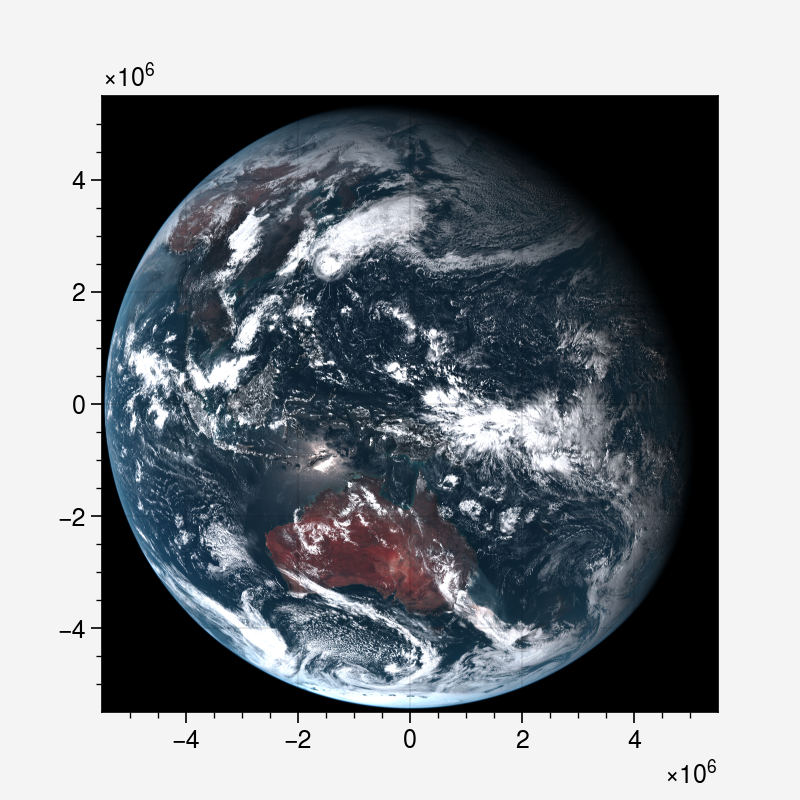

In [10]:
## Full satellite imagery for a partiuclar time.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values

plt.imshow(data, extent=[x[0], x[-1], y[-1], y[0]])

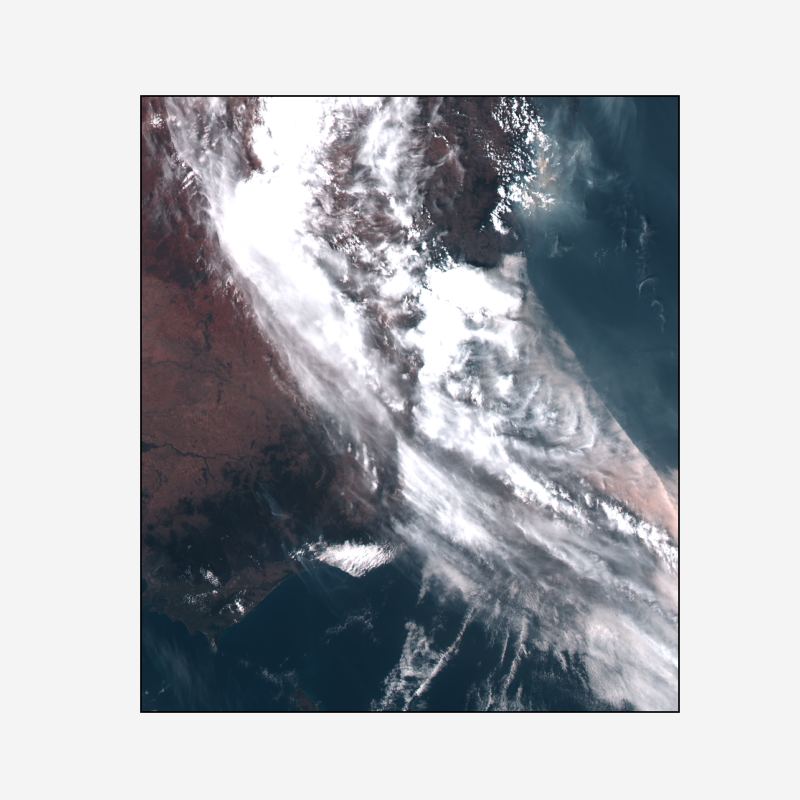

In [97]:
## Filtered image showing over certain latitude/longitude.
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([145, 155, -40, -30])
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [ ]:
## Returns maximum and minimum latitude and longitude values associated with radar data. 
def getRadarLatLon(radarfile):
    radar = getRadarData(radarfile)[0]
    lon, lat = radar.get_point_longitude_latitude()
    latmin, latmax = (np.min(lat), np.max(lat))
    lonmin, lonmax = (np.min(lon), np.max(lon))
    return (lon, lat, lonmin, lonmax, latmin, latmax)

In [23]:
f1 = getSatelliteData(year, month, day, time, 'f1')[0]
f2 = getSatelliteData(year, month, day, time, 'f2')[0]
f3 = getSatelliteData(year, month, day, time, 'f3')[0]

b1x = f1['x'].values
b1y = f1['y'].values
b2x = f2['x'].values
b2y = f2['y'].values
b3x = f3['x'].values
b3y = f3['y'].values
b1xn, b1yn = downGridXY(b1x, b1y, len(b1x), 5500)
b2xn, b2yn = downGridXY(b2x, b2y, len(b2x), 5500)
b3xn, b3yn = downGridXY(b3x, b3y, len(b3x), 5500)

In [29]:
b3xn[data_lat]

array([2892250., 2898250., 2900250., 2902250., 2904250., 2906250.,
       2908250., 2910250., 2912250., 2914250., 2916250., 2918250.,
       2920250., 2922250., 2924250., 2926250., 2928250., 2930250.,
       2932250., 2934250., 2936250., 2938250., 2940250., 2942250.,
       2944250., 2946250., 2948250., 2950250., 2952250., 2954250.,
       2956250., 2958250., 2960250., 2962250., 2964250., 2966250.,
       2968250., 2970250., 2972250., 2974250., 2976250., 2978250.,
       2980250., 2982250., 2984250., 2986250., 2988250., 2990250.,
       2992250., 2994250., 2996250., 2998250., 3000250., 3002250.,
       3004250., 3006250., 3008250., 3010250., 3012250., 3014250.,
       3016250., 3018250., 3020250., 3022250., 3024250., 3026250.,
       3028250., 3030250., 3032250., 3034250., 3036250., 3038250.,
       3040250., 3042250., 3044250., 3046250., 3048250., 3050250.,
       3052250., 3054250., 3056250., 3058250., 3060250., 3062250.,
       3064250., 3066250., 3068250., 3070250., 3072250., 30742

In [184]:
rgb, x, y = getCroppedVisible(year, month, day, time, -40, -30, 145, 155)

(413, 487)
(413, 487)
(413, 486)


/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)

KeyboardInterrupt



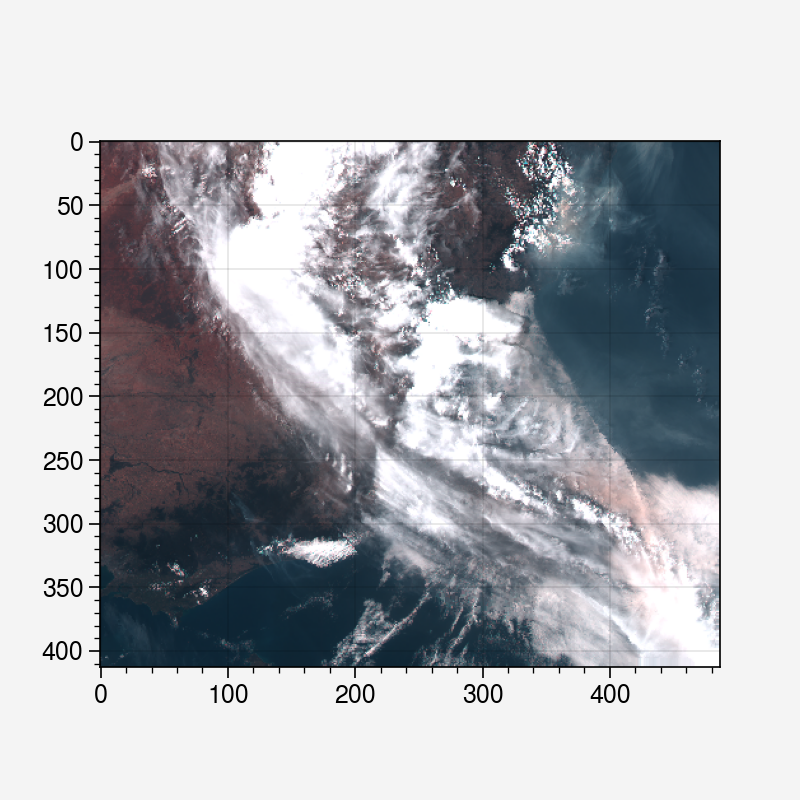

In [24]:
plt.imshow(rgb)

In [115]:
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getPetersonArray(year, month, day, time, radar_fp, lcl_ds, -40, -30, 145, 155)

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

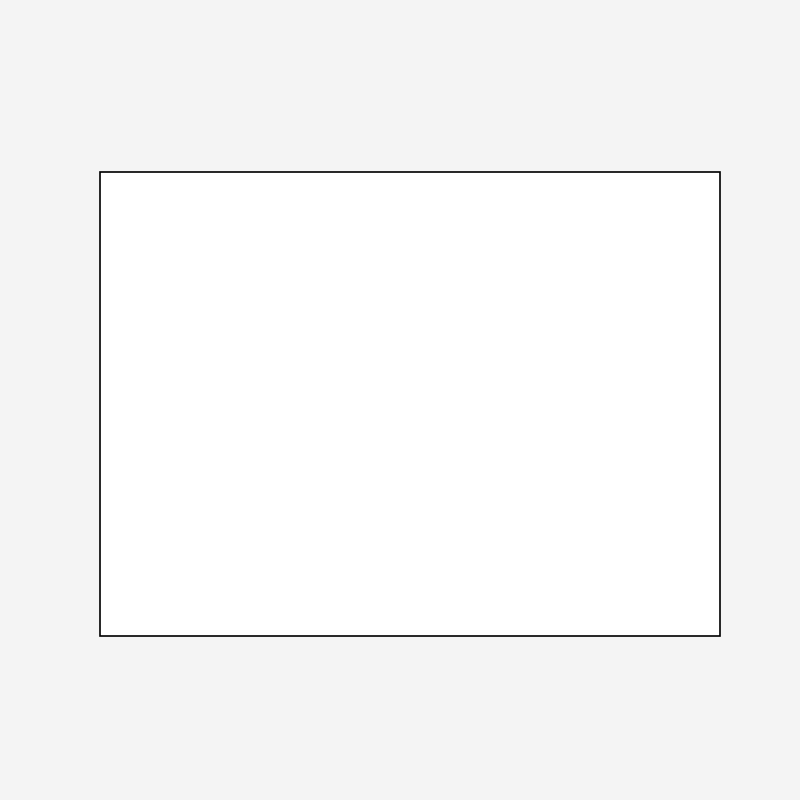

In [105]:
## Plotting the results of peterson array
peterson_data = peterson[0]
db_peterson = peterson[1]
ccrs_data = getRadarData(radar_fp)[2]
p = ccrs.PlateCarree()
ax = plt.axes(projection=p)
bounds_ccrs = [147, 151, -35, -32]
ax.set_extent(bounds_ccrs)

plt.imshow(rgb)

In [51]:
img = ax.imshow(peterson_data,
                transform = ccrs_data,
                extent = db_peterson,
                cmap = md.get_peterson_palette())
cbar_peterson = fig.colorbar(md.get_peterson_palette(), 
                    ax = ax, location = 'right', shrink = 1)
ticklabels = ["No daytime \n deep convection",
                "Deep convection \nor high thin clouds",
                "Marginal pyroCb", 
                "Intense pyroCb", ""]

2


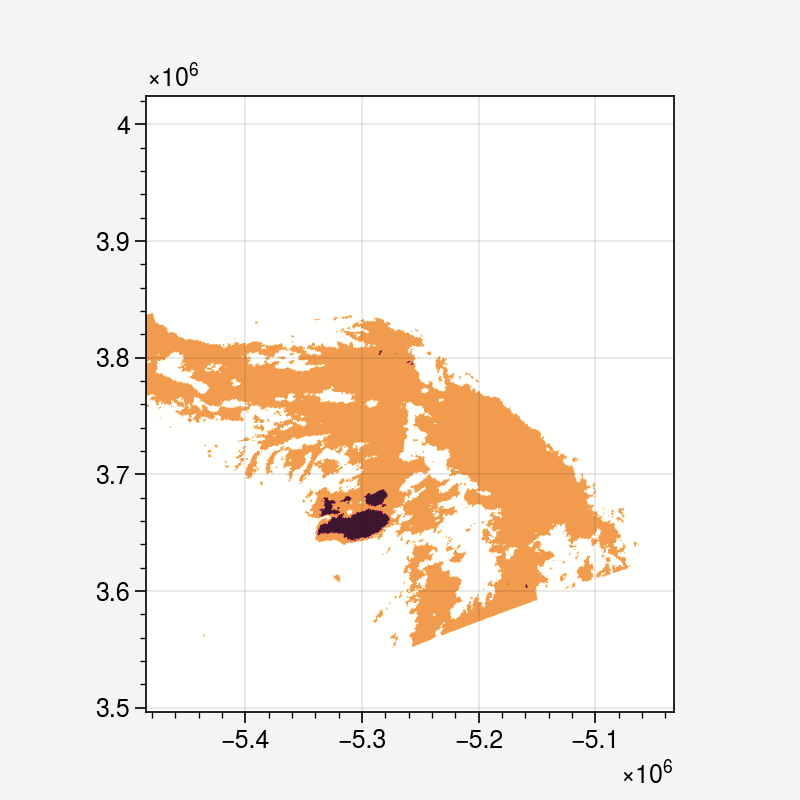

In [117]:
plt.imshow(peterson[0], extent=db_peterson)

In [20]:
## Getting data for some case studies
## The first case study will be on 1st February, 2020 near Mt. Clear, NSW

year = 2020
month = '02'
day = '01'
hour = '03'
time = '0300'

# data = OldGetVisible(year, month, day, time)



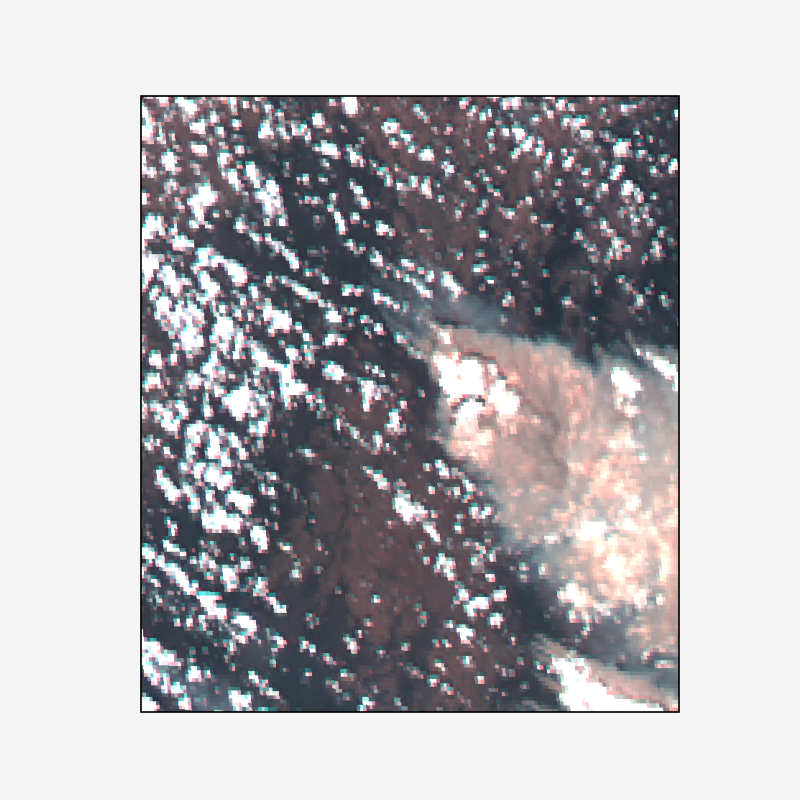

In [146]:
## Showing visible satellite imagery over a certain coordinates.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([148, 150, -37, -35])
# plt.plot(149.1, -35.9, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [21]:
rgb, x, y = getHighResCroppedVisible(year, month, day, time, -37, -35.3, 148.8, 150)

(274, 241)
(274, 241)
(274, 242)


/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

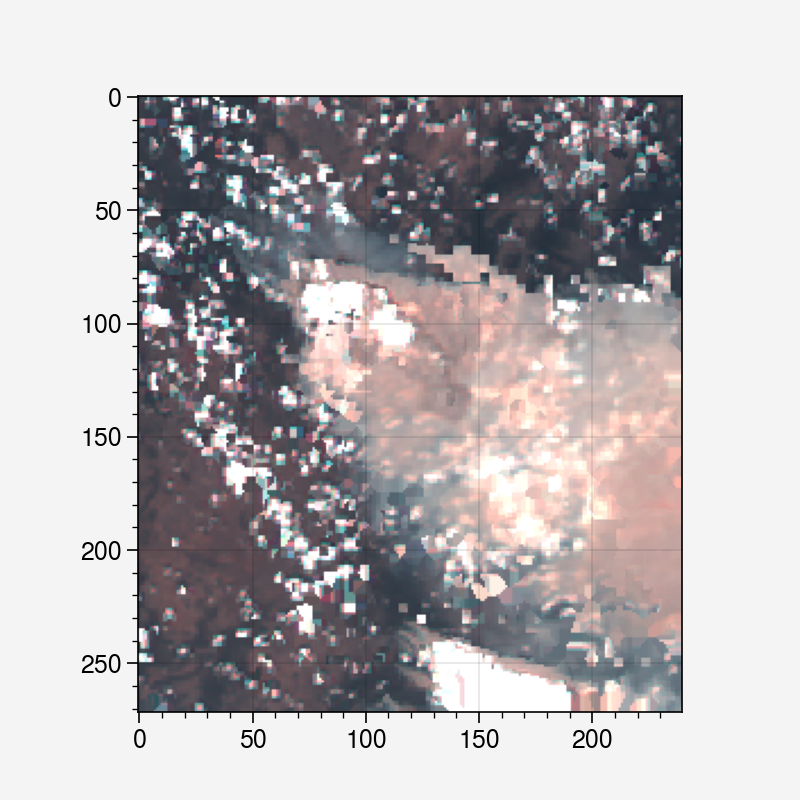

In [22]:
plt.imshow(rgb)

In [36]:
## Getting data for some case studies
## The next case study will be on 4th January, 2020 near Nowra, New South Wales

year = 2020
month = '01'
day = '04'
hour = '05'
time = '0530'

data = OldGetVisible(year, month, day, time)

(11000, 11000)
(11000, 11000)
(22000, 22000)


/jobfs/103174332.gadi-pbs/ipykernel_2108012/1307832101.py:24: RuntimeWarning: invalid value encountered in cast
  rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')


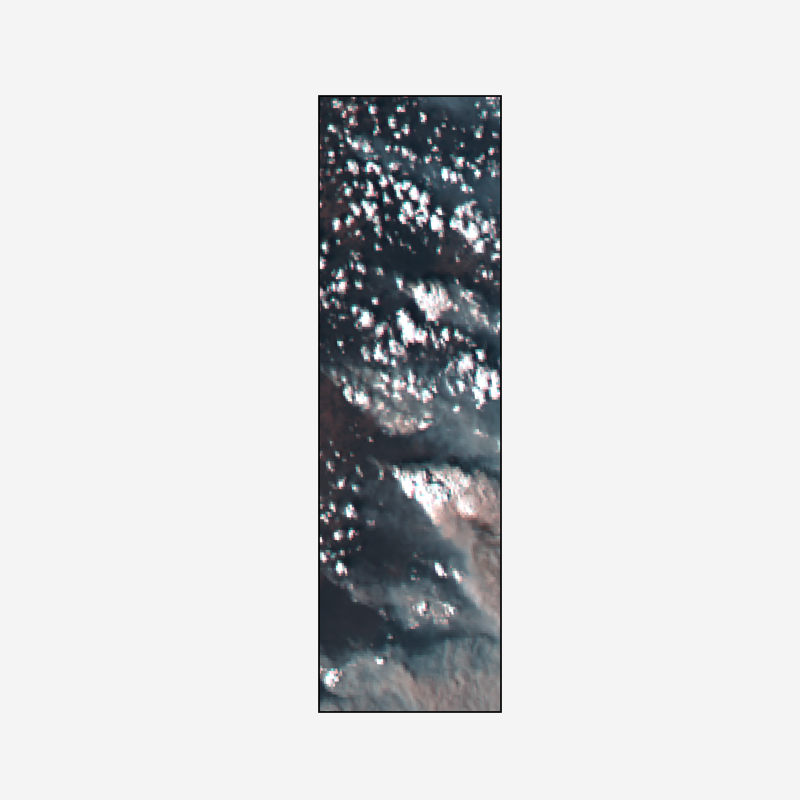

In [37]:
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([150, 151, -36, -33])
# plt.plot(150.4, -34.8, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [40]:
rgb, x, y = getHighResCroppedVisible(year, month, day, time, -36, -33, 150, 151)

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

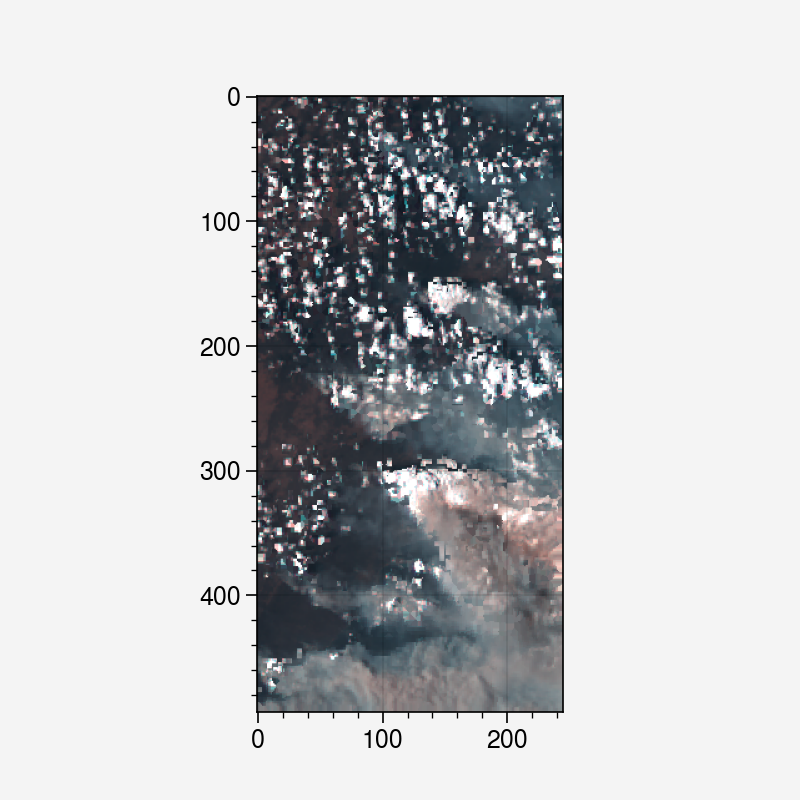

In [41]:
plt.imshow(rgb)

In [2]:
## Getting data for some case studies
## The next case study will be on 10th December, 2019 near Cockatoo Hill, New South Wales

year = 2019
month = 12
day = 10
hour = '05'
time = '0540'

# radarfp = "/g/data/kl02/jv1871/data/Radar/71_20191210_060028_ppi_final.nc"

# data = OldGetVisible(year, month, day, time)

NameError: name 'data' is not defined

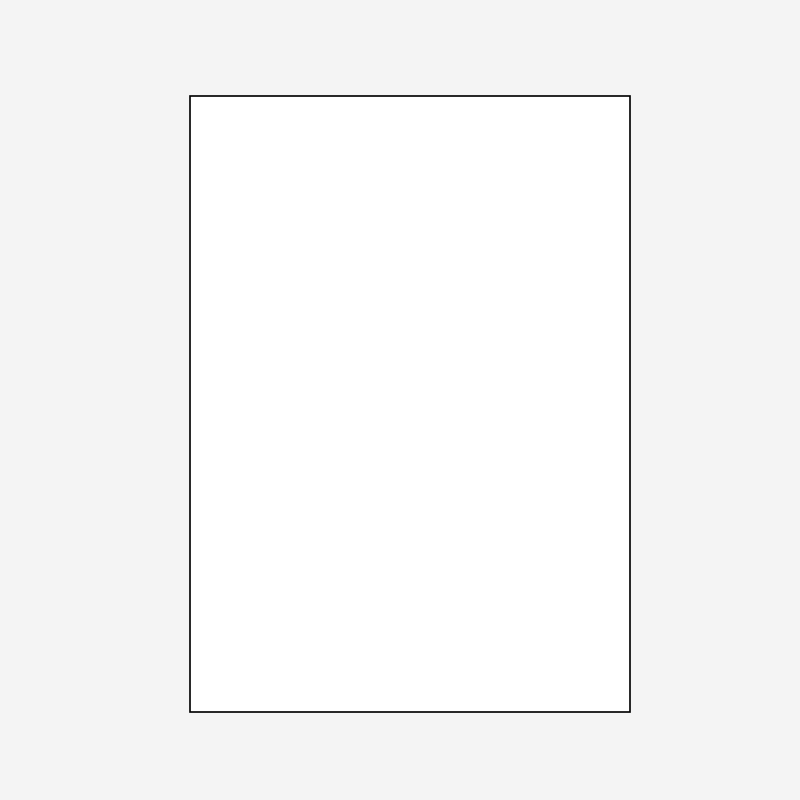

In [39]:
## Produces a visible image over a specified set of coordinates.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([149.5, 151.5, -34.5, -32])
# plt.plot(150.3, -33.4, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [40]:
## Gets the parallax corrected dataset for visible imagery.
rgb, x, y = getHighResCroppedVisible(year, month, day, time, -34.5, -32, 149.5, 151.5)

(425, 411)
(425, 411)
(425, 411)


/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

In [41]:
## Plotting channel 13 with zehr colorscheme

bt13 = getBT(year, month, day, time, -34.5, -32, 149.5, 151.5)

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [42]:
## Gets peterson data
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getUpGridPetersonArray(year, month, day, time, radar_fp, lcl_ds, -34.5, -32, 149.5 , 151.5)

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

(428, 412)


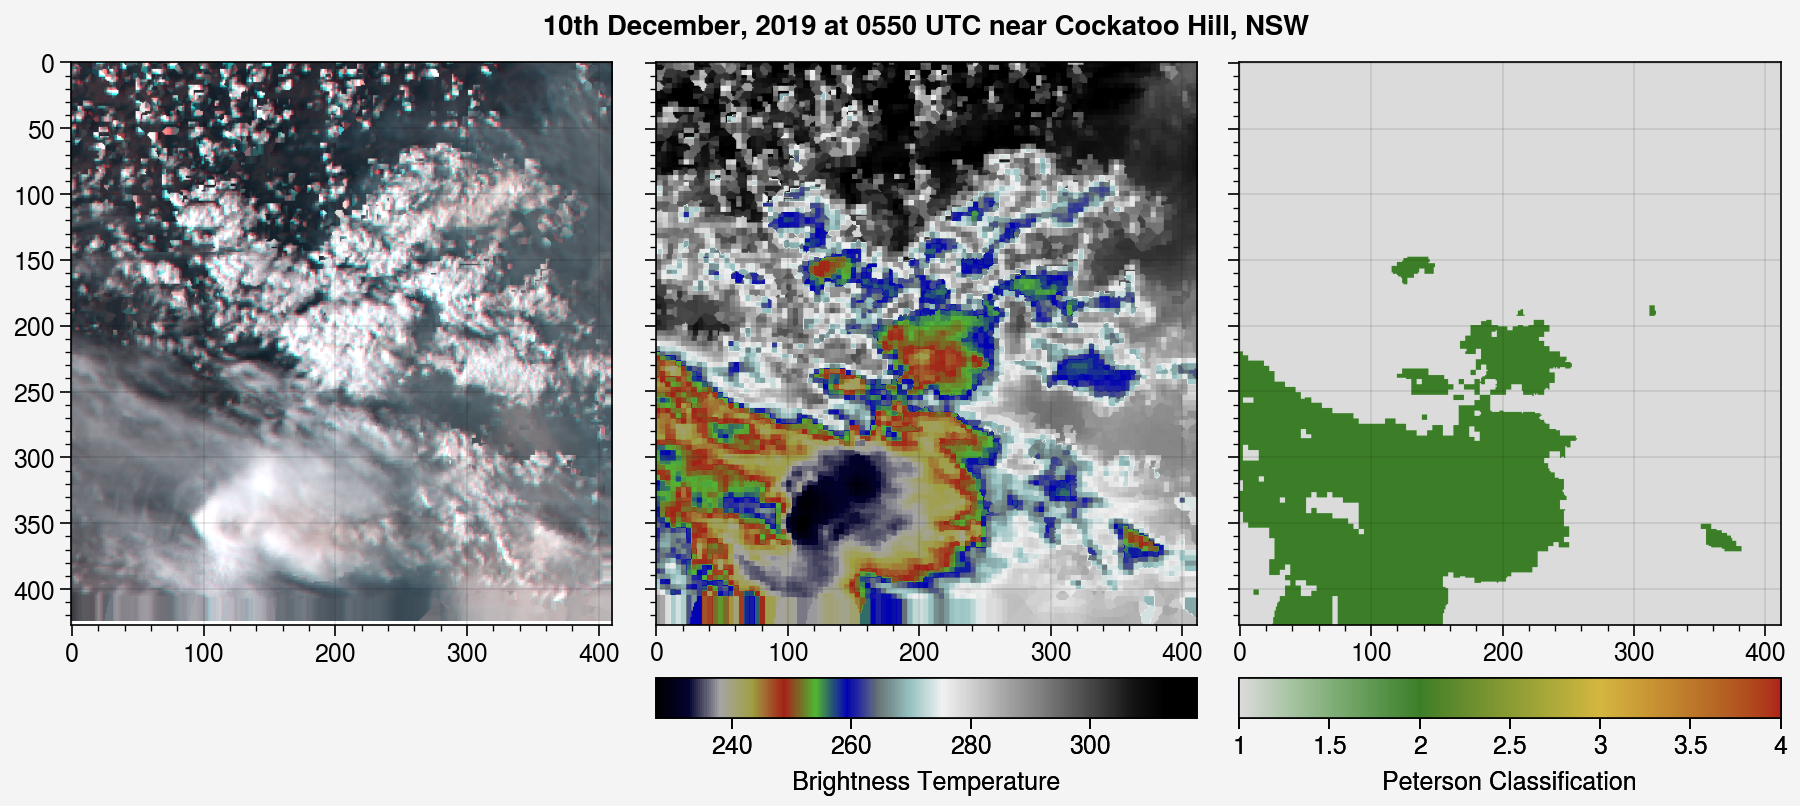

In [46]:
## Creates a three-panel plot with the above data.
kw = dict(cmap='gray')
fig, axs = pplt.subplots(ncols=3, nrows=1, width=9, suptitle="10th December, 2019 at 0550 UTC near Cockatoo Hill, NSW")
axs[0].imshow(rgb)
m = axs[1].imshow(bt13, cmap=md.get_zehr_colormap())
axs[1].colorbar(m, loc='b', label='Brightness Temperature')
n = axs[2].imshow(peterson, vmin=1, vmax=4, cmap=md.get_peterson_palette())
axs[2].colorbar(n, loc='b', label="Peterson Classification")
fig.save("figures/201912100550_71.png")

# The next case study will be on 28th December 2019 near Badja, NSW

In [23]:
## Getting data for some case studies

year = 2019
month = 12
day = 28
time = '0430'

# radarfp = "/g/data/kl02/jv1871/data/Radar/71_20191210_060028_ppi_final.nc"

# data = OldGetVisible(year, month, day, time)

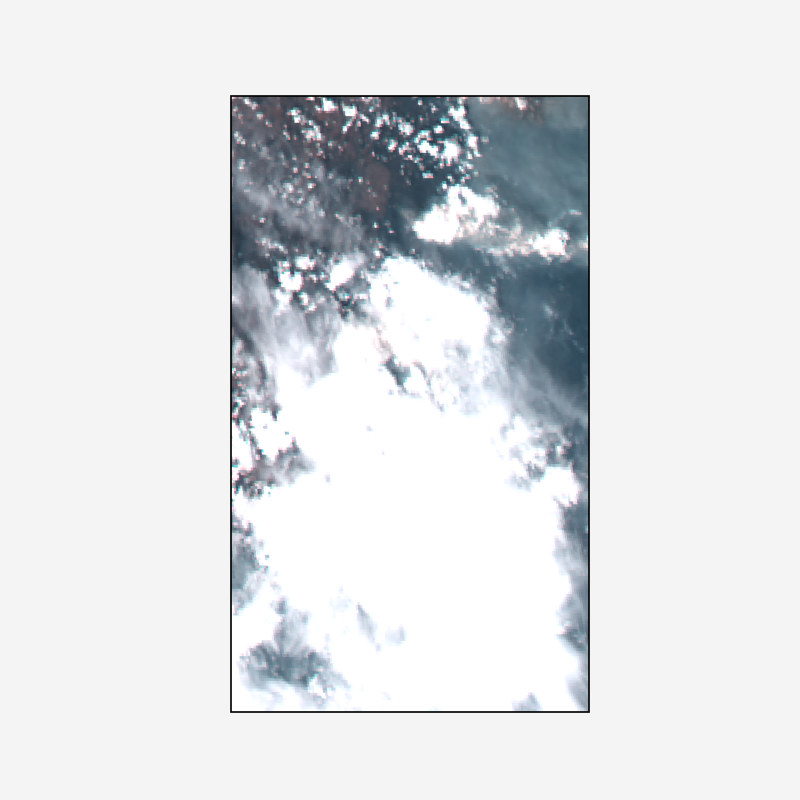

In [186]:
## Creates a visible image over a specified set of coordinates.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([149, 151, -37, -35])
# plt.plot(149.97, -35.58, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [26]:
## Creates a parallax corrected visible image. 
rgb, x, y = getHighResCroppedVisible(year, month, day, time, -38, -35, 149, 151)
print("Finished")

(480, 407)
(480, 407)
(480, 407)


/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)

KeyboardInterrupt



In [208]:
## Gets brightness temperature data.
bt13, nx, ny = getBT(year, month, day, time, -37, -35, 149, 151)
print("Finished")

Finished


In [209]:
## Gets Peterson information
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getUpGridPetersonArray(year, month, day, time, radar_fp, lcl_ds, -37, -35, 149, 151)
print("Finished")

(324, 388)
Finished


In [210]:
## Gets lightning data
lightning_ds = getLightningData(year, month, day, time, -37, -35, 149, 151)
ltng = np.where(lightning_ds.lightning_density > 0, lightning_ds.lightning_density, np.nan)

In [127]:
xmin, xmax, ymin, ymax = getXYBoundaries(-37, -35, 149, 151)

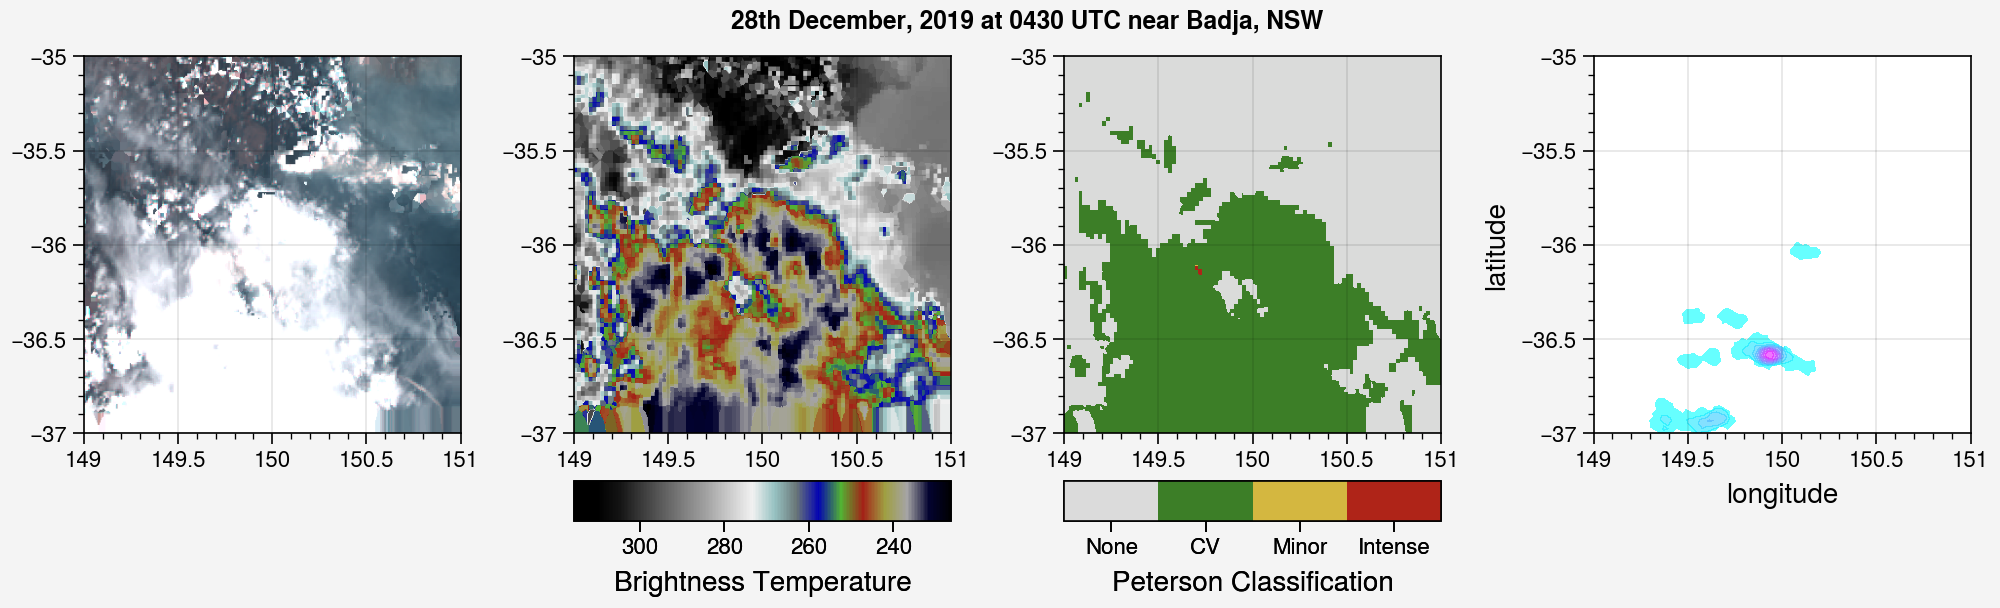

In [211]:
## Creates a 4-panel plot with the above data.
kw = dict(cmap='gray')
labels = list(("None", "CV", "Minor", "Intense"))
fig, axs = pplt.subplots(ncols=4, nrows=1, width=10, suptitle="28th December, 2019 at 0430 UTC near Badja, NSW", sharex = False, sharey = False)
axs[0].imshow(rgb, extent=[149, 151, -37, -35])
axs[0].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)
m = axs[1].imshow(bt13, cmap=md.get_zehr_colormap(), extent=[149, 151, -37, -35])
axs[1].colorbar(m, loc='b', label='Brightness Temperature', reverse=True)
axs[1].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)
n = axs[2].imshow(peterson, cmap=md.get_peterson_palette(), vmin=0.5, vmax=4, discrete=True, N=5, extent=[149, 151, -37, -35])
axs[2].colorbar(n, loc='b', ticks=np.arange(0.8, 4.1, 0.8) + 0.4, ticklabels=labels, label="Peterson Classification")
axs[2].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)
axs[3].contourf(lightning_ds.longitude, lightning_ds.latitude, ltng, vmax = 1.1*np.nanmax(ltng), ymin=-37, ymax= -35,
                 cmap = 'cool', alpha = 0.6)
axs[3].format(xlim=(149, 151), ylim=(-37, -35))
axs[3].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)
fig.save('figures/20191228/201912280430_40.png')

In [122]:
imageio.help(name='GIF-PIL')

GIF-PIL - Compuserve GIF via Pillow

    See :mod:`imageio.plugins.pillow_legacy`



In [126]:
## Creates a gif using frames created using the above code.
frames = []
hour = 5
minutes = 30
with imageio.get_writer('figures/20191228_40.gif', mode='I', duration=10, loop=5) as writer:
    for i in range(13):
        if (minutes == 60):
            hour += 1
            image = imageio.imread('figures/20191228/201912280%d00_40.png' % hour)
            minutes = 10
            writer.append_data(image)
        else:
            image = imageio.imread('figures/20191228/201912280{hour}{minutes}_40.png'.format(hour=hour, minutes=minutes))
            minutes += 10
            writer.append_data(image)

In [108]:
frame_one = frames[0]
frame_one.save("20191228_40.gif", format="GIF", append_images=frames[1:], optimize=False, save_all=True, duration=1000, loop=0)

In [124]:
print(writer)

# The next case study will be on 21st December near Ulladulla, NSW

In [54]:
## Getting data for some case studies

year = 2019
month = 12
day = 21
hour = '07'
time = '0730'

# radarfp = "/g/data/kl02/jv1871/data/Radar/71_20191210_060028_ppi_final.nc"

data = OldGetVisible(year, month, day, time)

KeyboardInterrupt: 

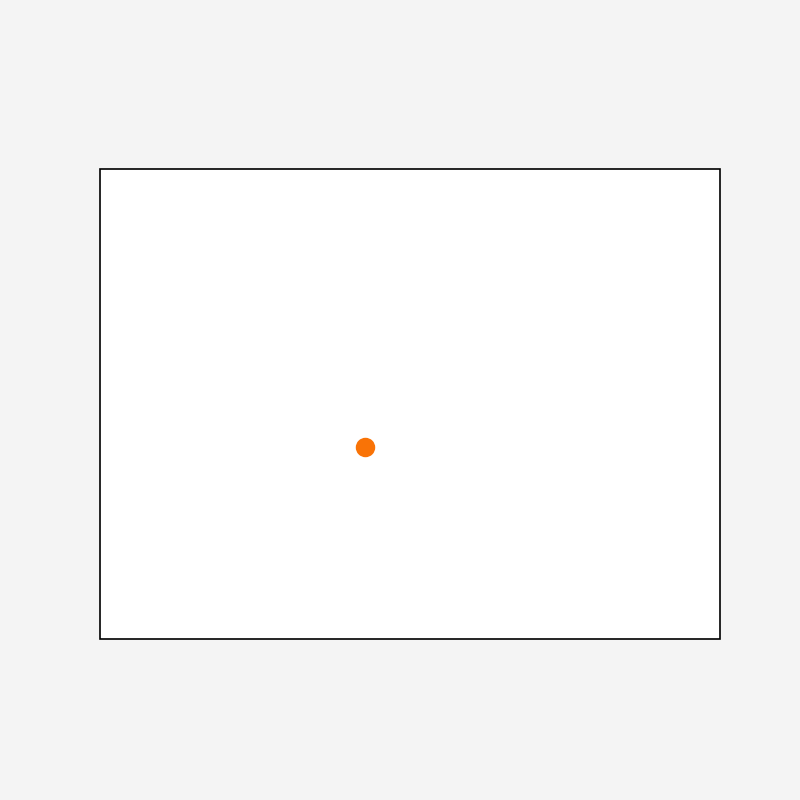

In [55]:
## Creates a visible image over a specified area.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([149, 152, -34, -36])
plt.plot(150.28, -35.19, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [56]:
## Gets peterson data over a specified area.
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getUpGridPetersonArray(year, month, day, time, radar_fp, lcl_ds, -36, -34, 149, 152)
print("Finished")

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

(332, 564)
Finished


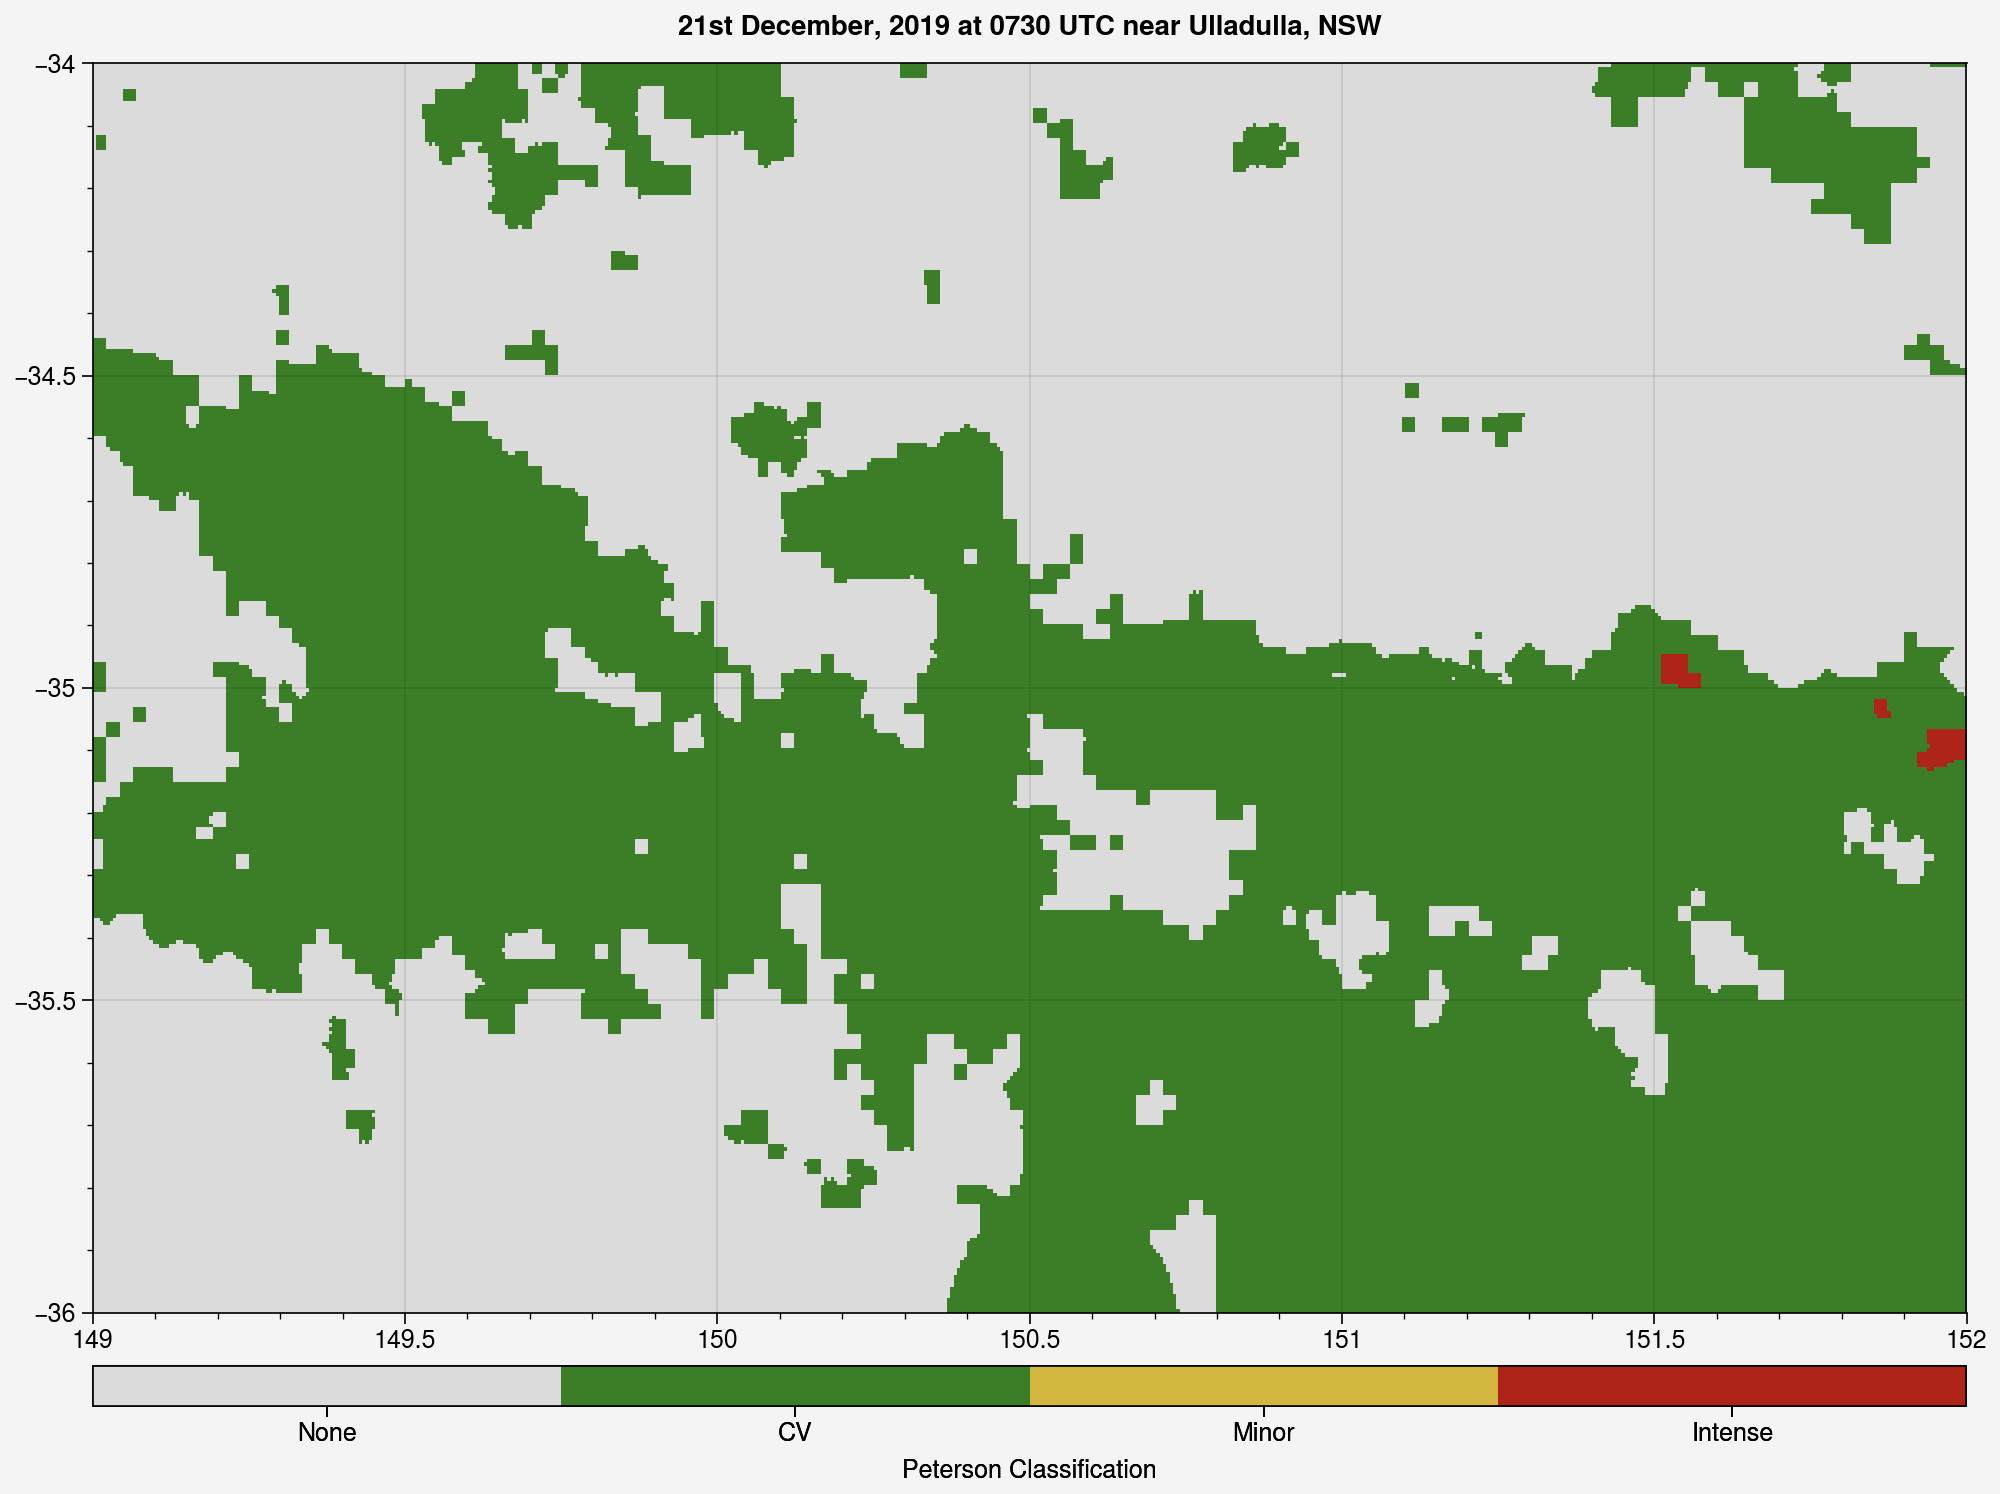

In [57]:
## Plots peterson data over a specified area.
labels = list(("None", "CV", "Minor", "Intense"))
fig, axs = pplt.subplots(ncols=1, nrows=1, width=10, suptitle="21st December, 2019 at 0730 UTC near Ulladulla, NSW", sharex = False, sharey = False)
n = axs[0].imshow(peterson, cmap=md.get_peterson_palette(), vmin=0.5, vmax=4, discrete=True, N=5, extent=[149, 152, -36, -34])
axs[0].colorbar(n, loc='b', ticks=np.arange(0.8, 4.1, 0.8) + 0.4, ticklabels=labels, label="Peterson Classification")
axs[0].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)

In [197]:
## Trying to read in radar
radar = pyart.io.read('40_20191228_060029_ppi.nc')

## Get radar variables necessary for methods below.
range = ma.getdata(radar.range['data'])
azimuth = ma.getdata(radar.azimuth['data'])
elevation = ma.getdata(radar.elevation['data'])
corrected_reflectivity = ma.getdata(radar.fields['corrected_reflectivity']['data'])
start_index = ma.getdata(radar.sweep_start_ray_index['data'])
end_index = ma.getdata(radar.sweep_end_ray_index['data'])

In [259]:
## Call cloud_top_height and maximum_reflectivity methods.
cloudtop = et.cloud_top_height(range, azimuth, elevation, start_index, end_index, corrected_reflectivity)
max_reflectivity = et.column_max_reflectivity(range, azimuth, elevation, start_index, end_index, corrected_reflectivity)
max_reflectivity = np.where(max_reflectivity < 0, np.nan, max_reflectivity)

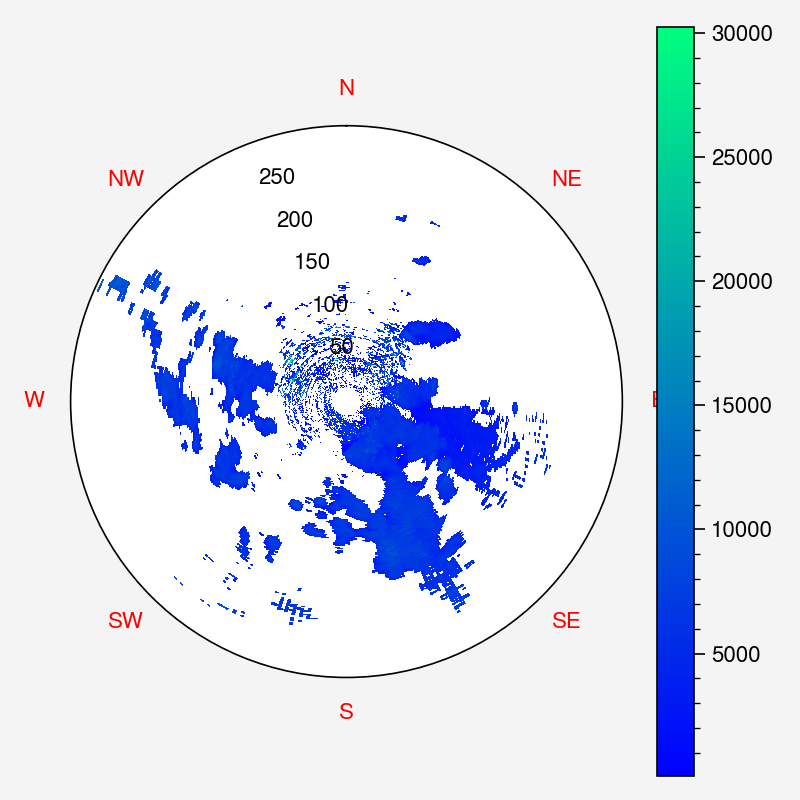

In [268]:
## Create figuress using above data.
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
theta = np.linspace(2*np.pi, 0, 360)
pc = ax.pcolormesh(theta, range/1000, cloudtop.T, cmap='winter')
fig.colorbar(pc, location='right')
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'NW', 'W', 'SW', 'S', 'SE', 'E', 'NE'], color='red')
plt.tight_layout()
plt.savefig("figures/Sample Cloudtop.png")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
theta = np.linspace(2*np.pi, 0, 360)
pc = ax.pcolormesh(theta, range/1000, max_reflectivity.T, cmap='RdYlGn', vmin=0)
fig.colorbar(pc, location='right')
ax.set_theta_zero_location('N')
ax.set_xticklabels(['N', 'NW', 'W', 'SW', 'S', 'SE', 'E', 'NE'], color='blue')
plt.tight_layout()
plt.savefig("figures/Sample Reflectivity")

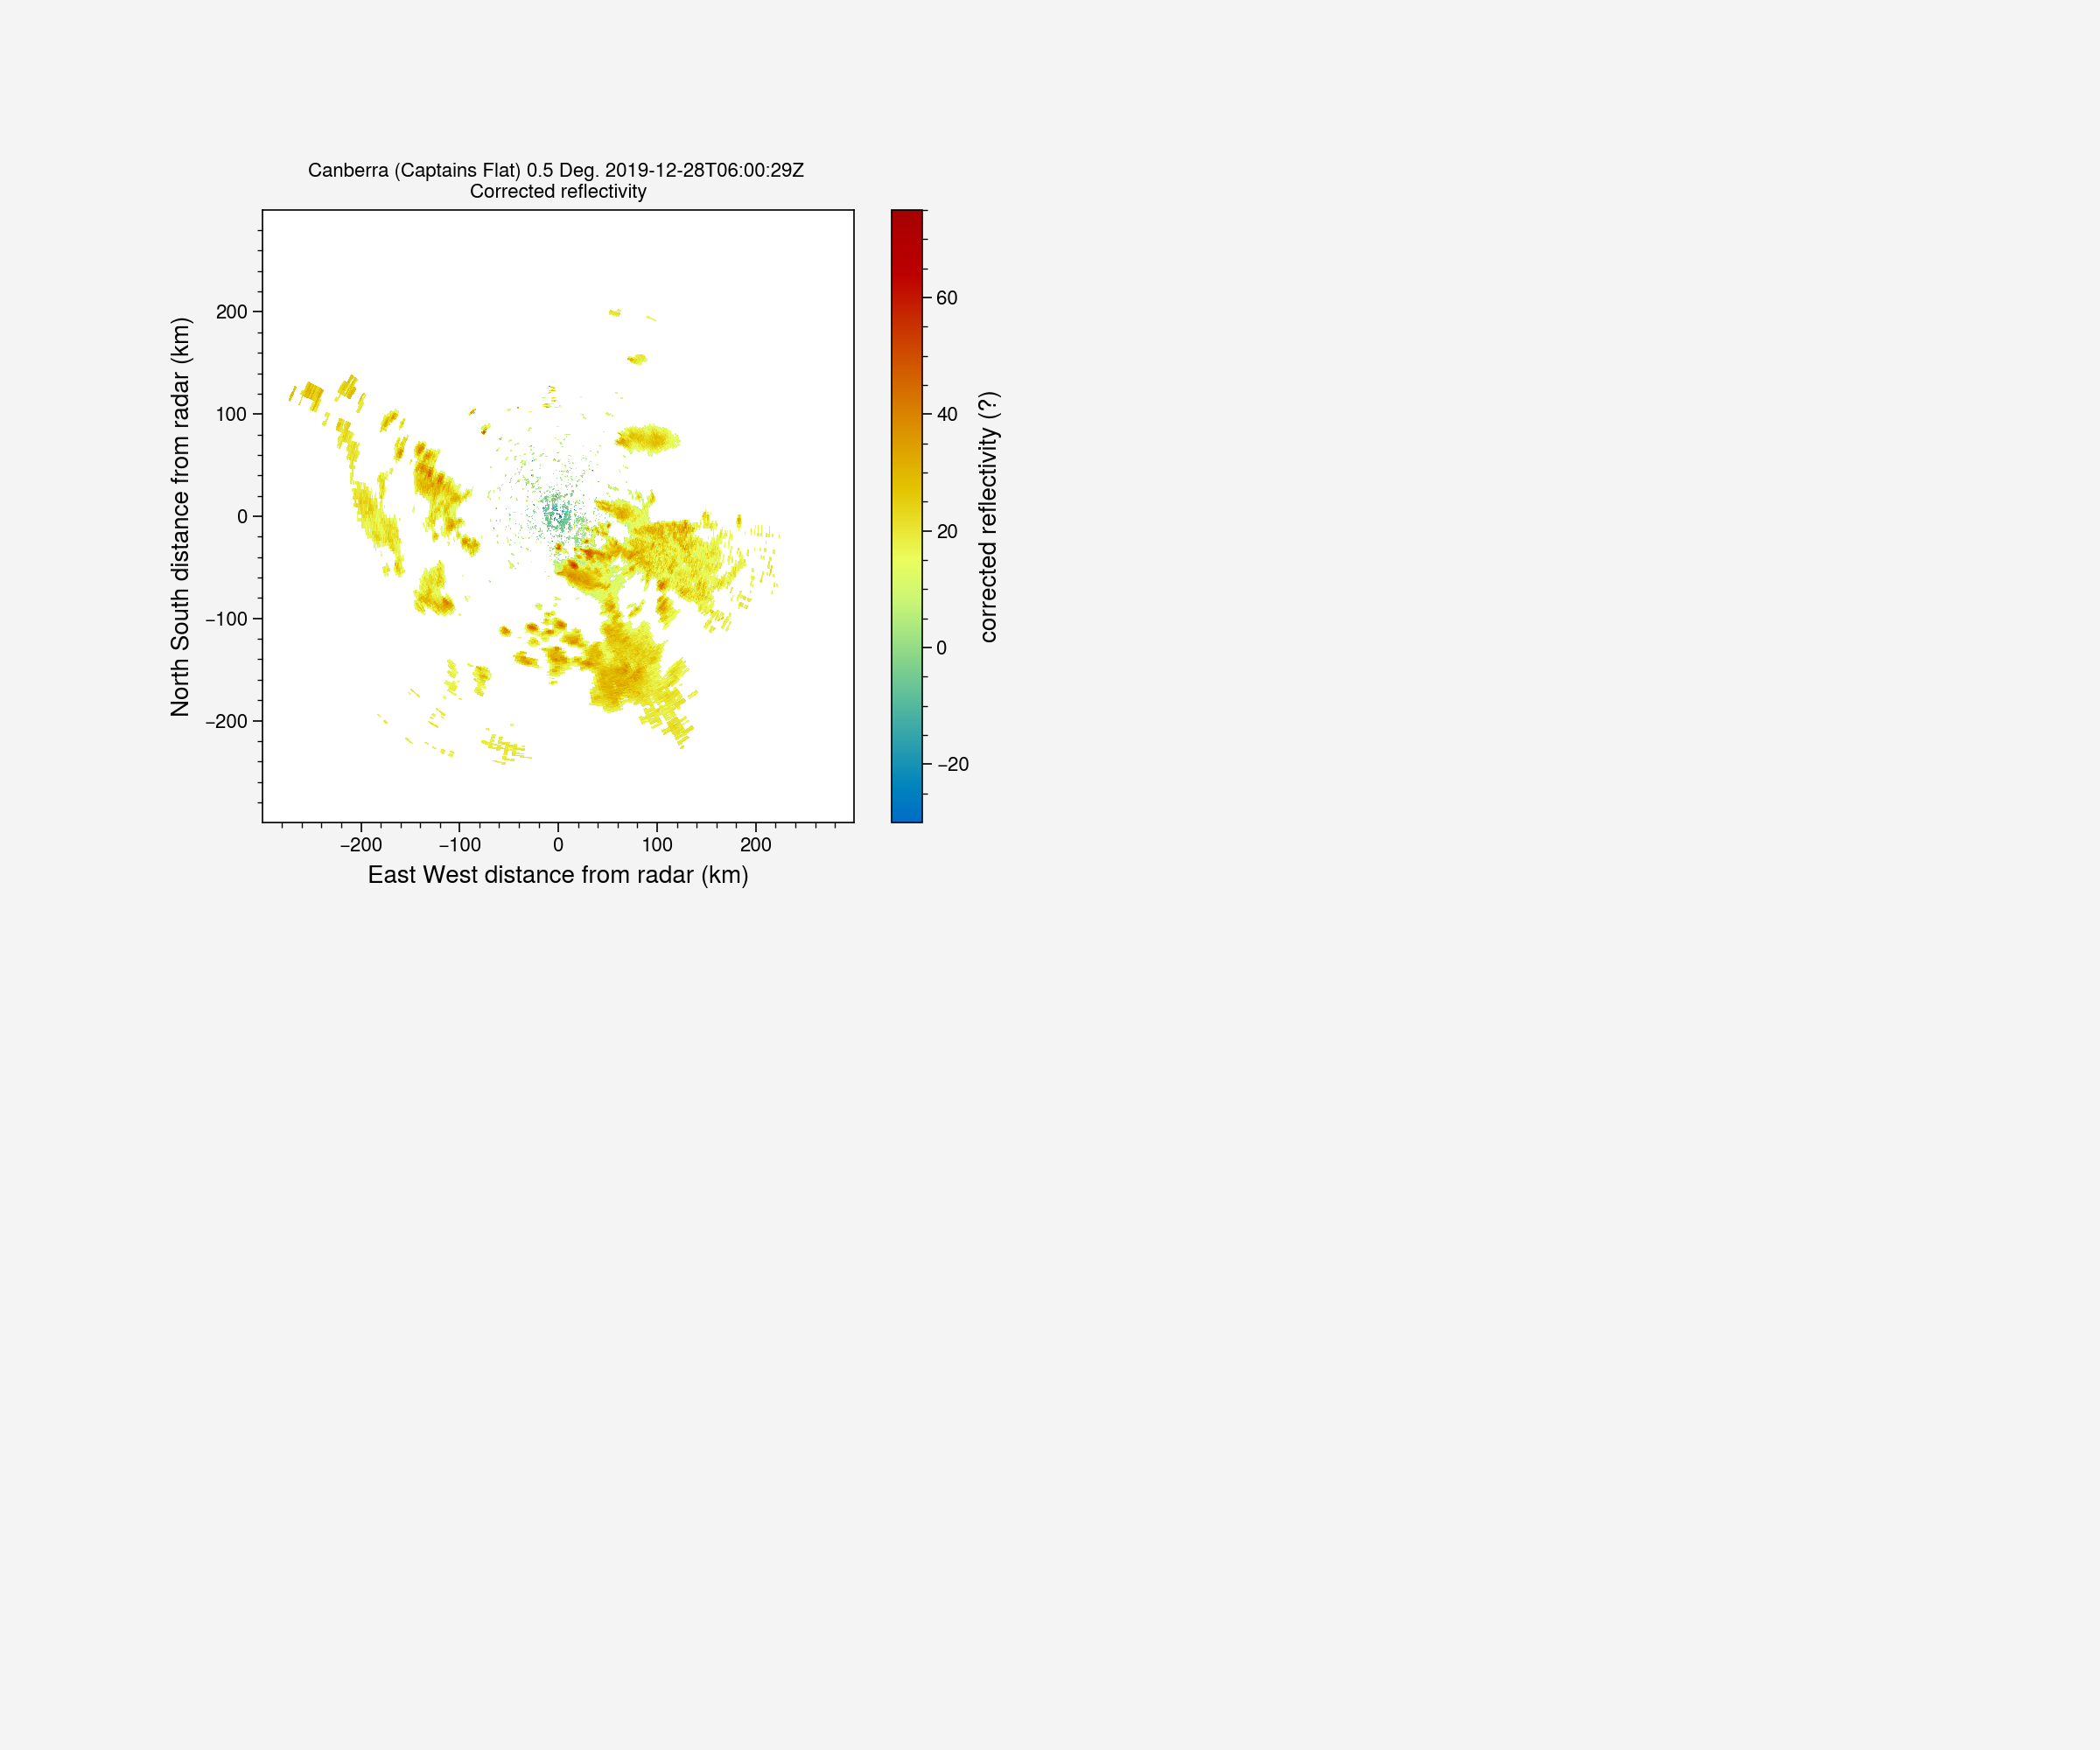

In [206]:
## Create figure using above dataset.
fig = plt.figure(figsize=(12,10))
display = pyart.graph.RadarDisplay(radar)
ax1 = plt.subplot(221)
display.plot_ppi("corrected_reflectivity", sweep=0, ax=ax1)

# The next case study will be on 10th December near Mt. Werong, NSW

In [78]:
## Getting data for some case studies

year = 2019
month = 12
day = 10
hour = '06'
time = '0630'

# radarfp = "/g/data/kl02/jv1871/data/Radar/71_20191210_060028_ppi_final.nc"

# data = OldGetVisible(year, month, day, time)

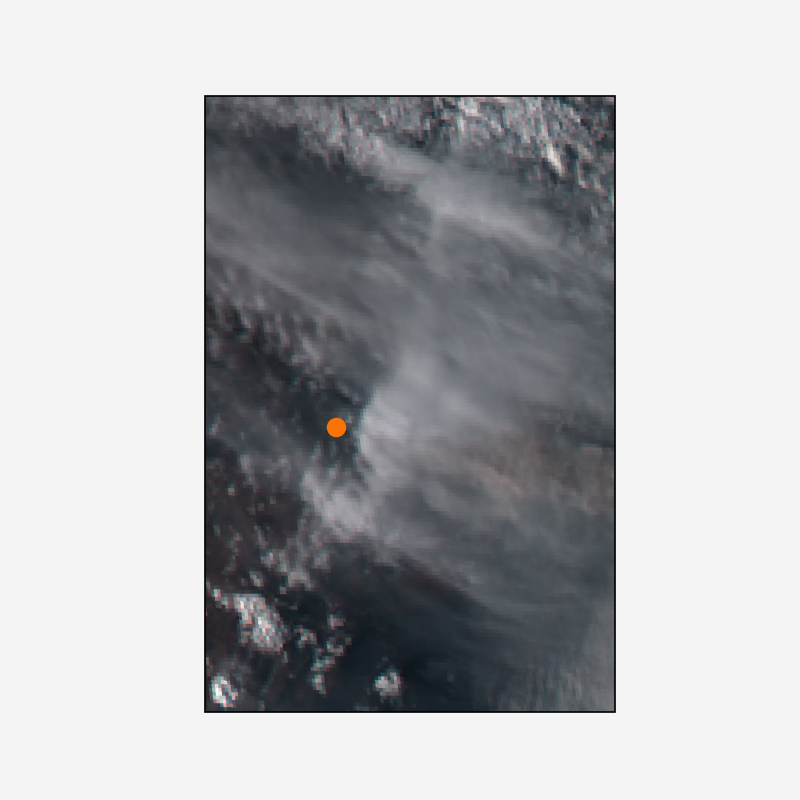

In [77]:
## Create a visible image over a specified area.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([149.5, 151, -33, -35])
plt.plot(149.98, -34.08, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [79]:
## Get Peterson algorithm information.
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getUpGridPetersonArray(year, month, day, time, radar_fp, lcl_ds, -35, -33, 149.5, 151)
print("Finished")

/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/196/jv1871/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj 

(336, 312)
Finished


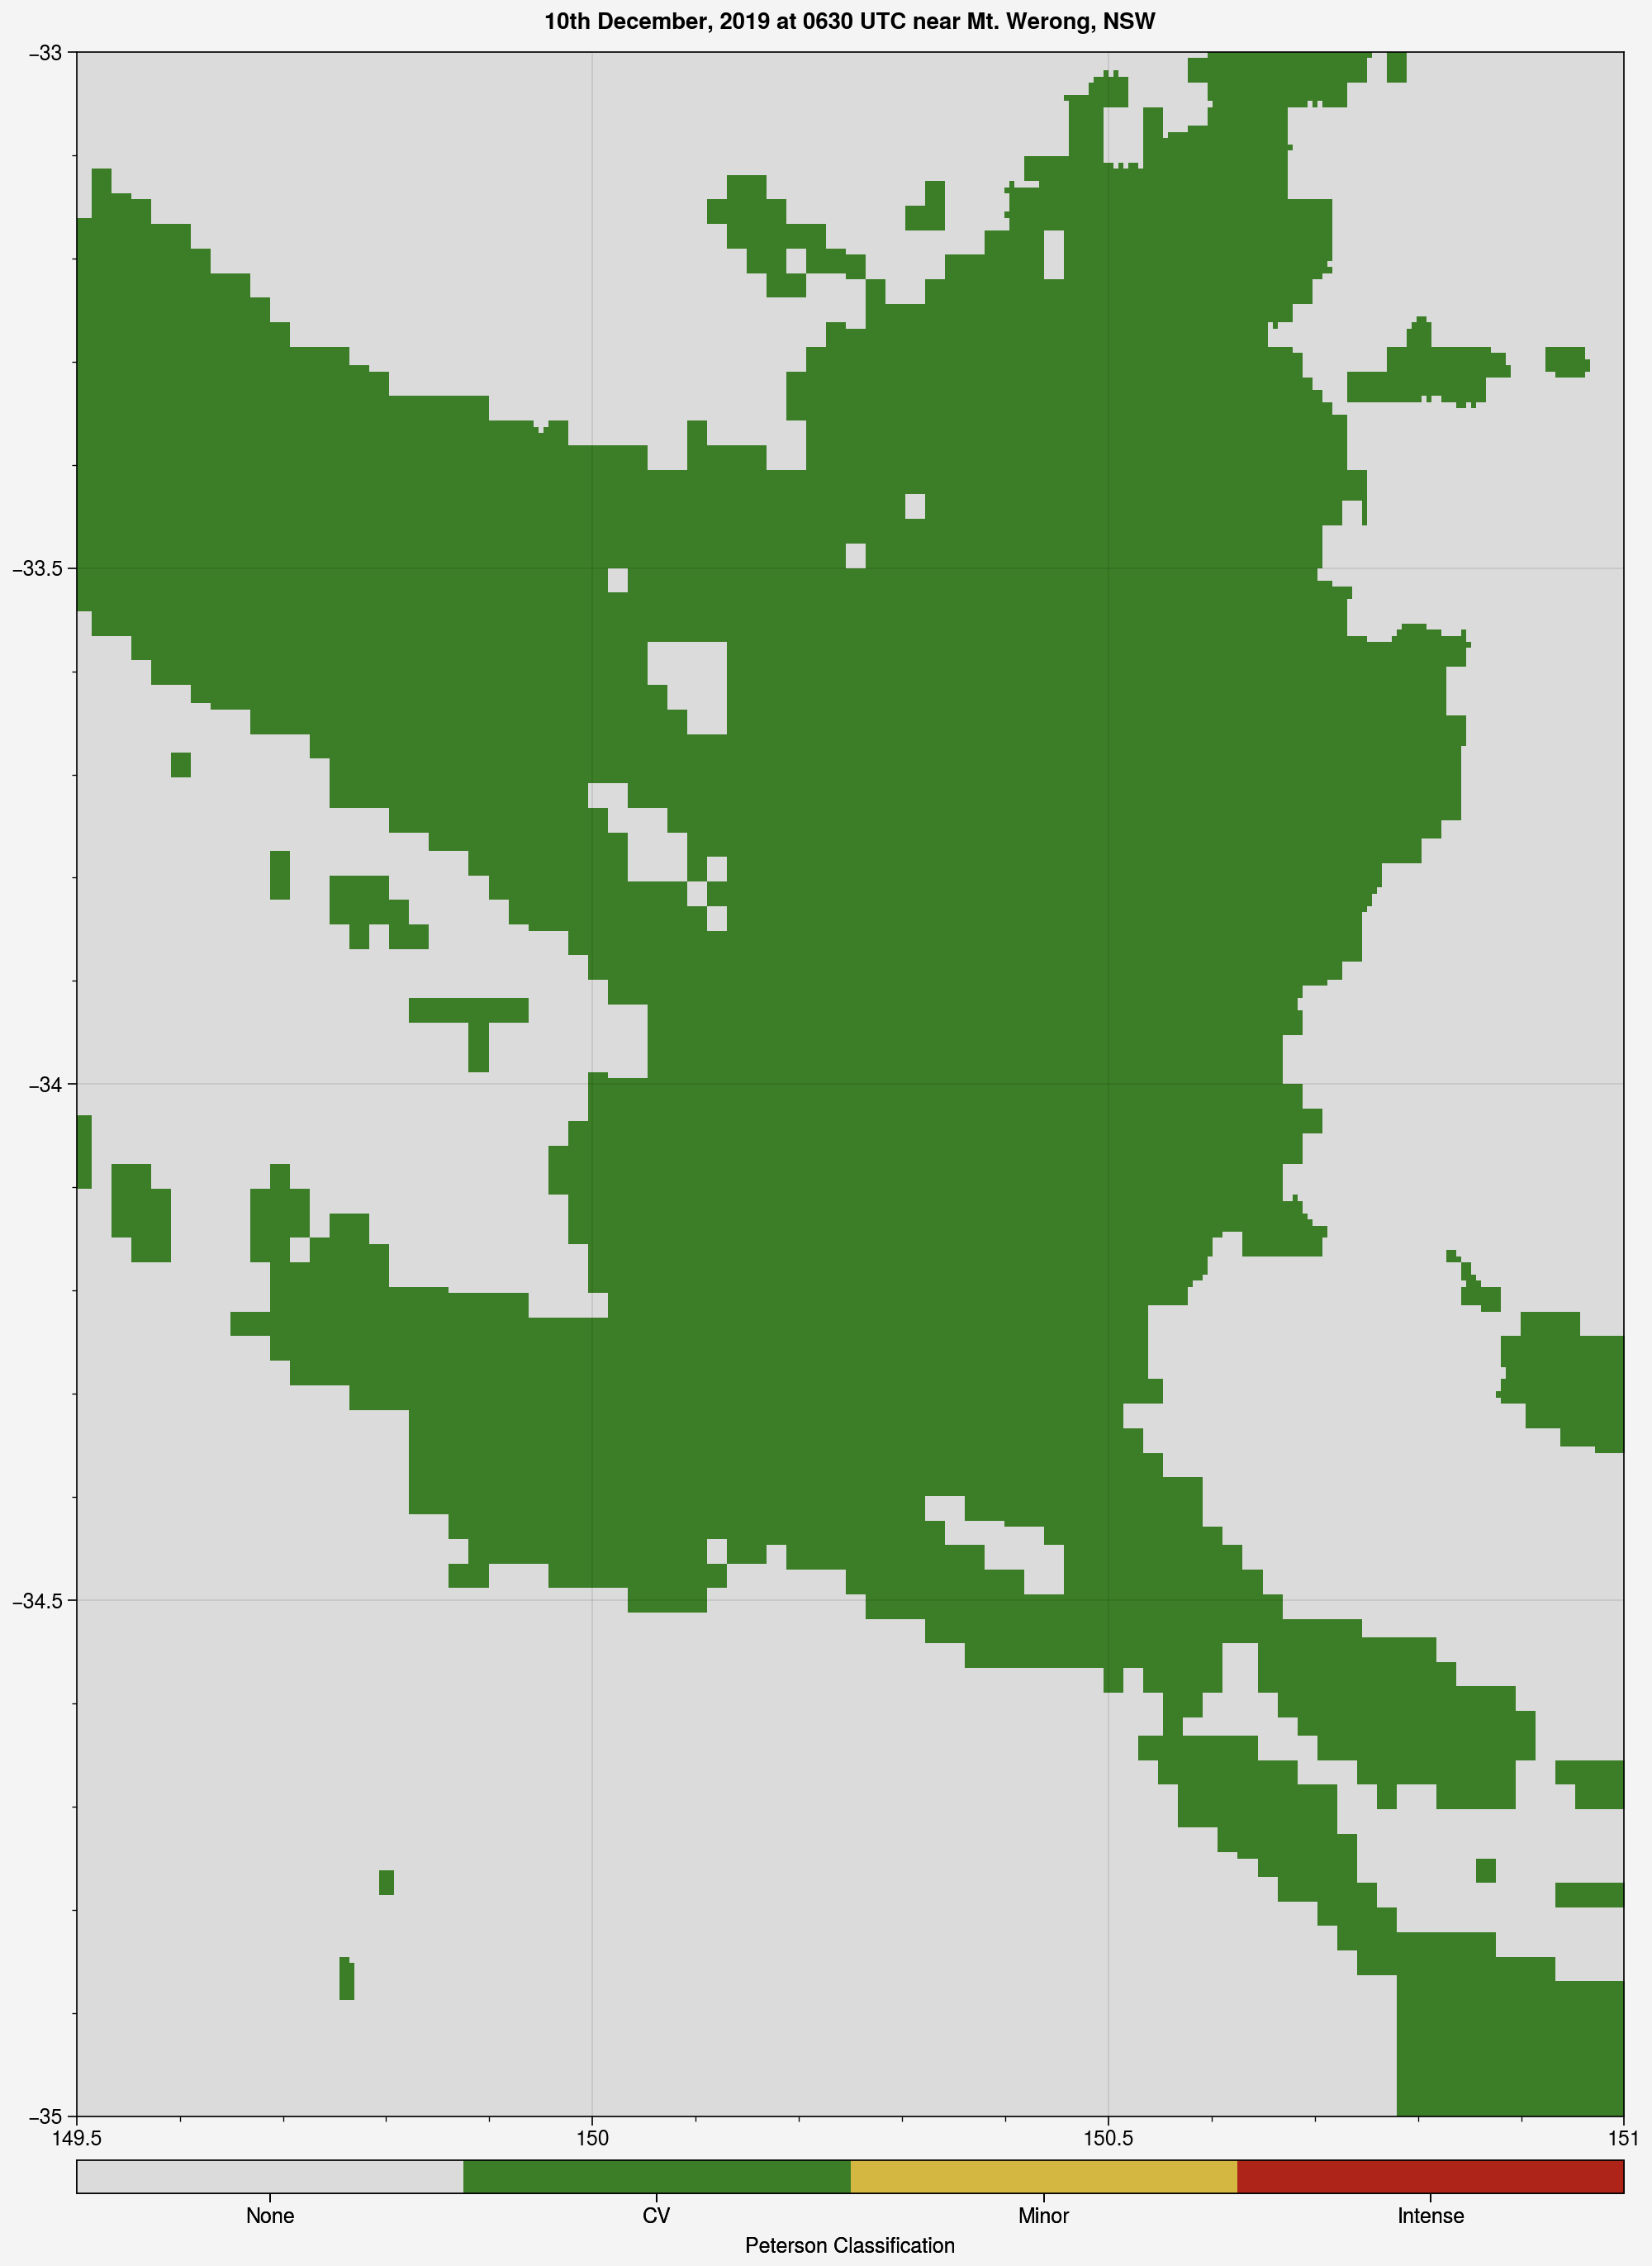

In [80]:
## Plot peterson data.
labels = list(("None", "CV", "Minor", "Intense"))
fig, axs = pplt.subplots(ncols=1, nrows=1, width=10, suptitle="10th December, 2019 at 0630 UTC near Mt. Werong, NSW", sharex = False, sharey = False)
n = axs[0].imshow(peterson, cmap=md.get_peterson_palette(), vmin=0.5, vmax=4, discrete=True, N=5, extent=[149.5, 151, -35, -33])
axs[0].colorbar(n, loc='b', ticks=np.arange(0.8, 4.1, 0.8) + 0.4, ticklabels=labels, label="Peterson Classification")
axs[0].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)

# The final case study will be on 2nd March, 2019 near Bunyip, VIC

In [98]:
## Getting data for some case studies

year = 2019
month = '03'
day = '02'
hour = '06'
time = '0630'

# radarfp = "/g/data/kl02/jv1871/data/Radar/71_20191210_060028_ppi_final.nc"

data = OldGetVisible(year, month, day, time)

(11000, 11000)
(11000, 11000)
(22000, 22000)


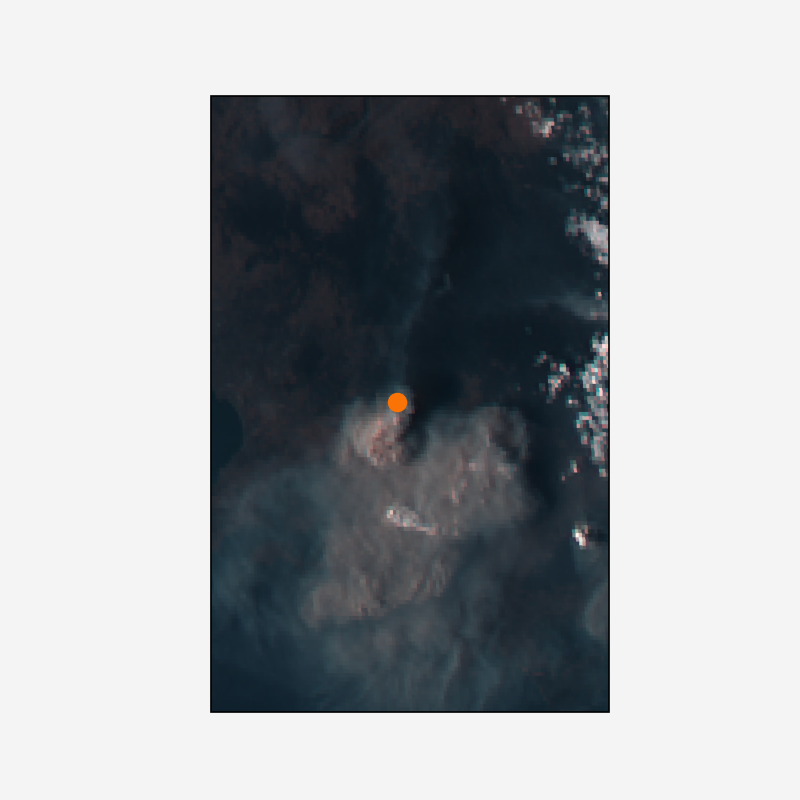

In [99]:
## Show visible image over a specified area.
f1 = getSatelliteData(year, month, day, time, "f1")[0]
x = f1['x'].values
y = f1['y'].values
img_proj = ccrs.Geostationary(central_longitude=f1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=f1['geostationary'].satellite_height)
img_extent = (x[0], x[-1], y[-1], y[0])
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(f1['geostationary'].longitude_of_projection_origin)))
ax.set_extent([145, 146.5, -39, -37])
plt.plot(145.7, -38, color='orange', linewidth=2, marker='o', transform=ccrs.Geodetic())
plt.imshow(data, transform=img_proj, extent=img_extent, origin='upper')

In [96]:
## Get peterson data over a specified area.
lcl_ds = xarray.open_dataset('data/data_lcl_nsw_black_summer.nc')
peterson = getUpGridPetersonArray(year, month, day, time, radar_fp, lcl_ds, -39, -37, 145, 146.5)
print("Finished")

(312, 280)
Finished


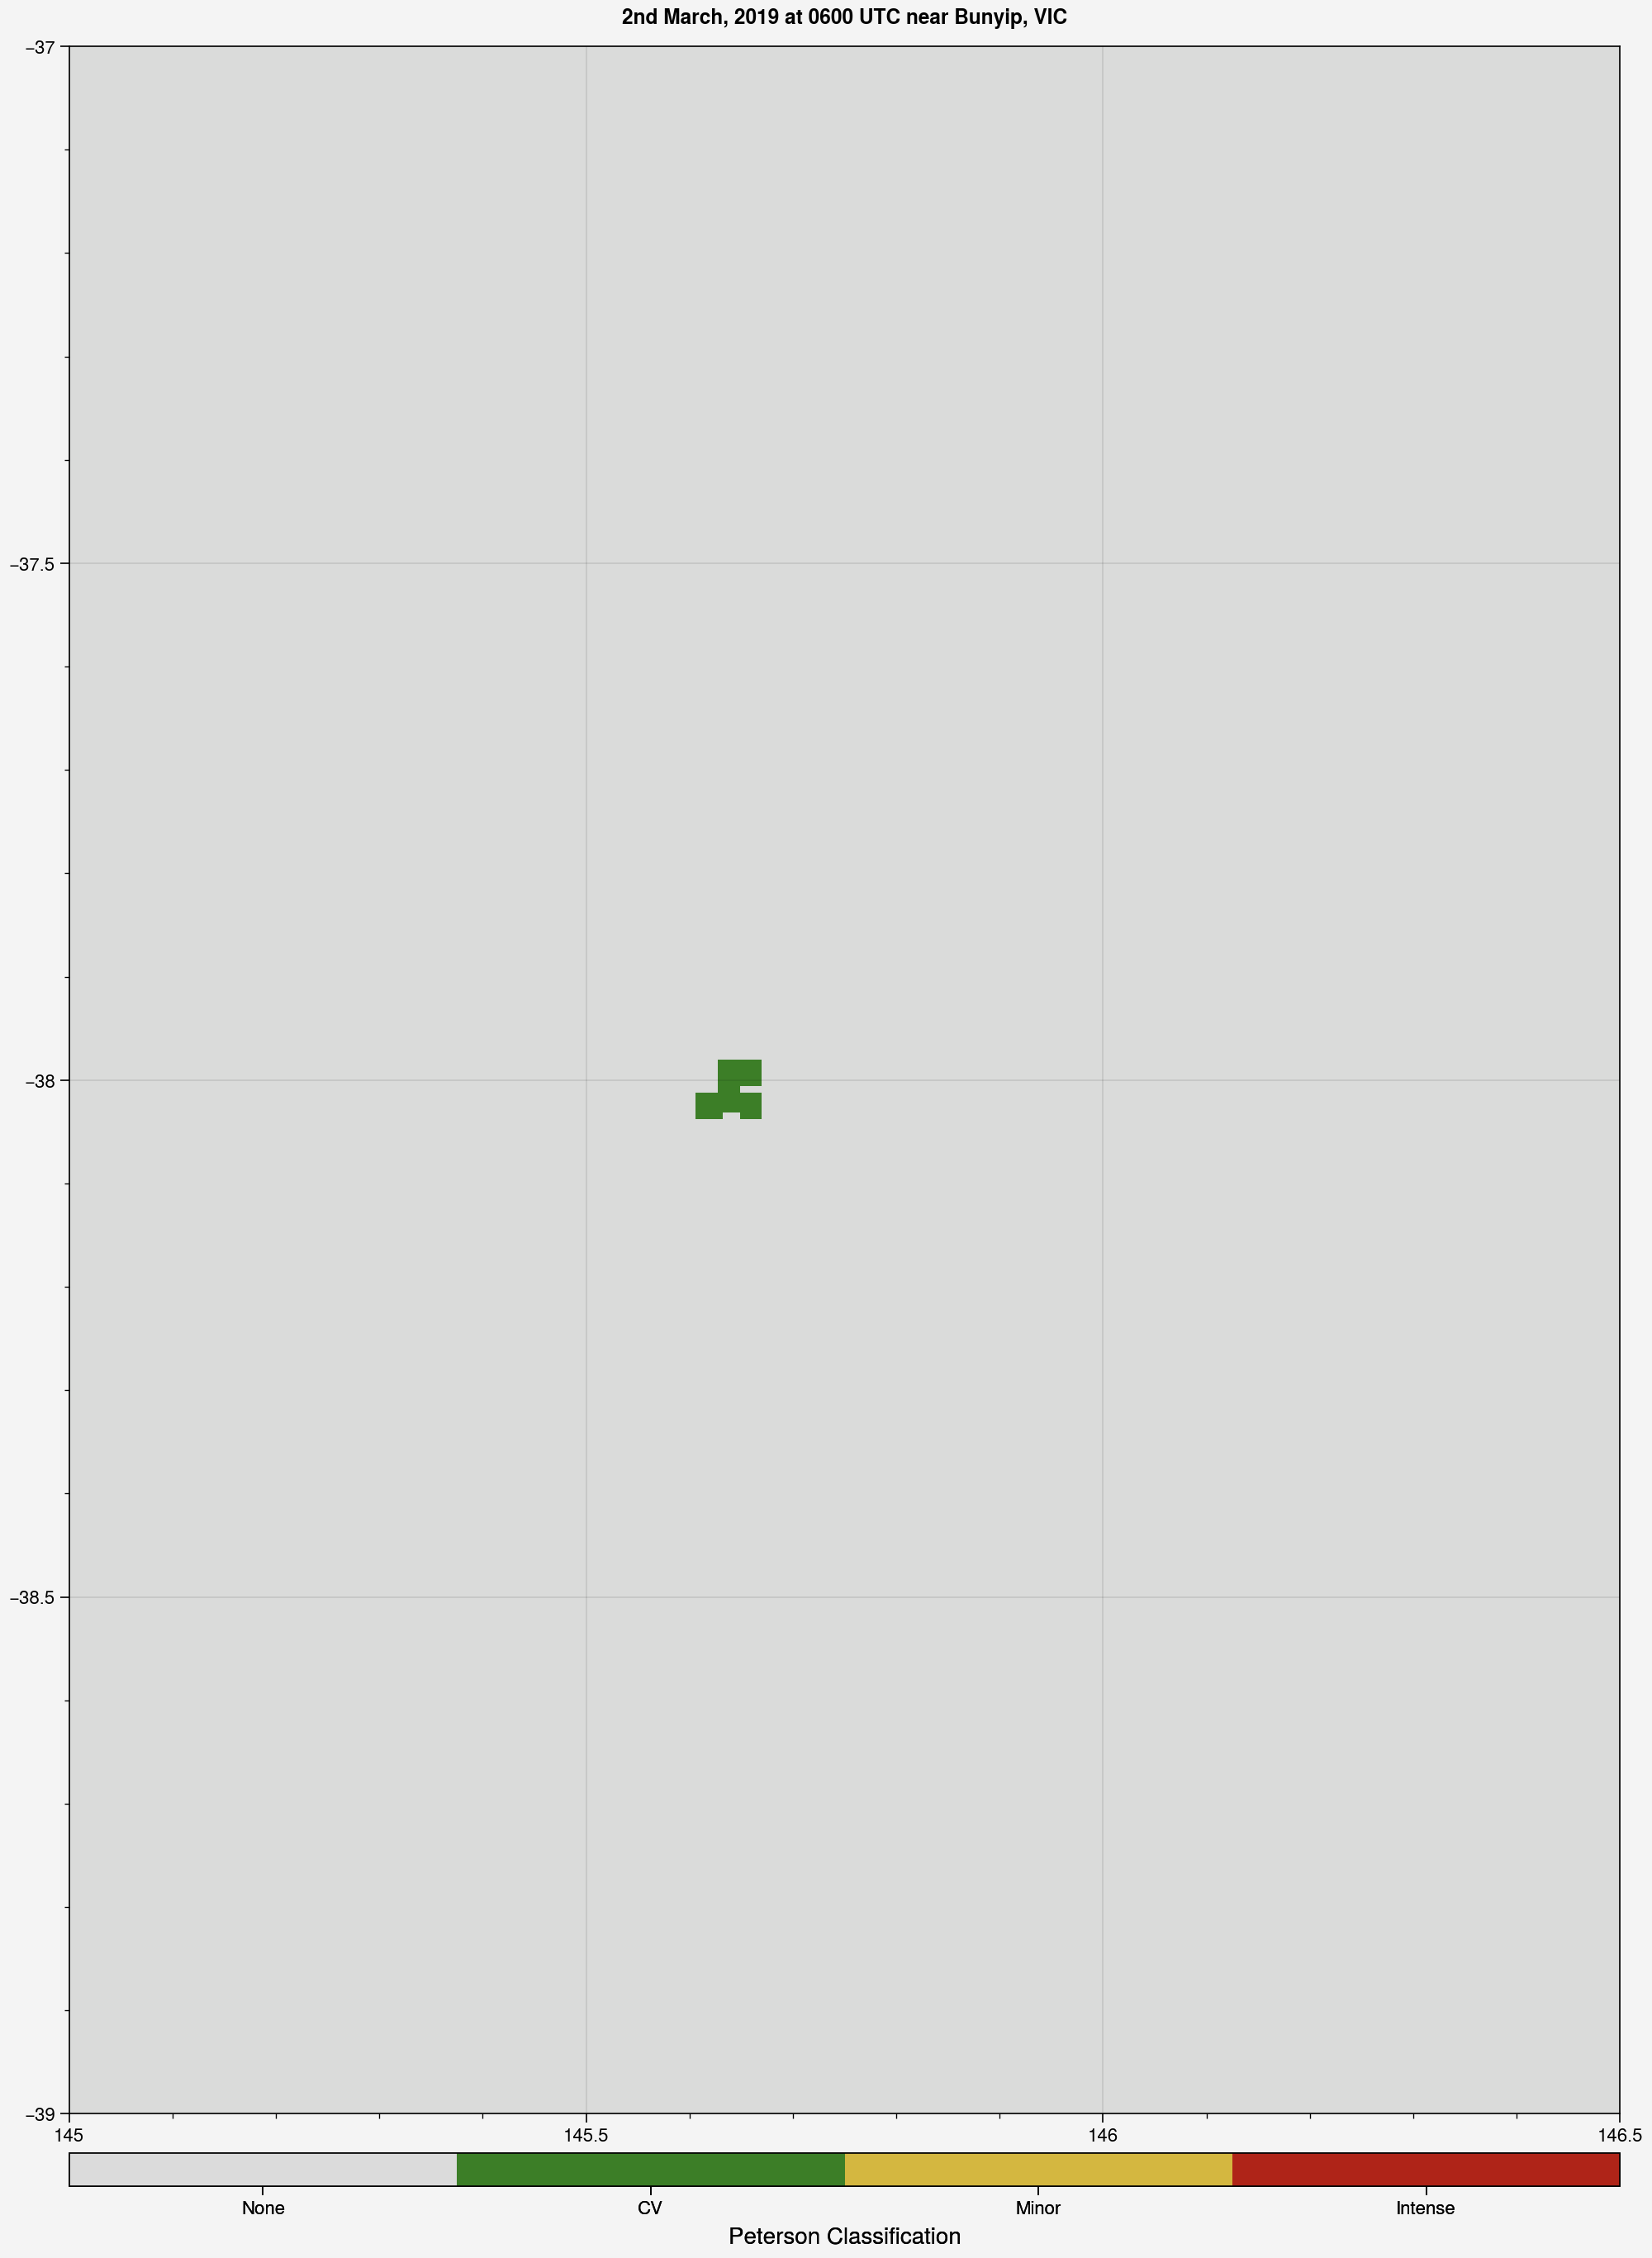

In [97]:
## Show peterson data over a specified area.
labels = list(("None", "CV", "Minor", "Intense"))
fig, axs = pplt.subplots(ncols=1, nrows=1, width=10, suptitle="2nd March, 2019 at 0600 UTC near Bunyip, VIC", sharex = False, sharey = False)
n = axs[0].imshow(peterson, cmap=md.get_peterson_palette(), vmin=0.5, vmax=4, discrete=True, N=5, extent=[145, 146.5, -39, -37])
axs[0].colorbar(n, loc='b', ticks=np.arange(0.8, 4.1, 0.8) + 0.4, ticklabels=labels, label="Peterson Classification")
axs[0].format(xminorlocator=0.1, xlocator=0.5, yminorlocator=0.1, ylocator=0.5)